# SQL Injection Detection on DPU
This code can run on Google Colab or local Jupyter Notebook.

In [44]:
#@title ## Configurations
from pathlib import Path
#This takes quite a time to run all test takes times.
# If you only want to only visualise
# an existing results file, tick the following box
visualise_only_dont_rerun_experiments = True #@param {type:"boolean"}
latex_dir_str = "paper_SQLi_detection_DPU" #@param {type:"string"}

# This is used to save the generated tables and figures for the paper.
SAVE_OUTPUTS = False #@param {type:"boolean"}
result_file_name = "results_230422_222732.csv" #@param ["new_results.csv", "results_230422_222732.csv"]
main_folder = Path('./')
latex_dir = Path(latex_dir_str)

results_file = main_folder / 'results' / result_file_name
print(results_file.is_file())
assert results_file.is_file(), f'File: "{results_file}" does not exists.'

# Output file name for the new experiments
file_name = "new_results.csv"


True


### Download the code


In [2]:
import os

# Check if the code is running on Google Colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# Clone and rename the repo
if IN_COLAB:
  print("You are using Google Colab.")
  !git clone https://github.com/gdrlab/dpu-sqli-detection.git
  print("Renaming folder dpu-sqli-detection to dpu_sqli_detection")
  !mv dpu-sqli-detection dpu_sqli_detection
else:
  print("You are not using Google Colab. Make sure to install necessary libraries (use sqli-env.yml and Mamba) and Git (https://git-scm.com/downloads)")
  os.system('git clone https://github.com/gdrlab/dpu-sqli-detection.git')
  print("Renaming folder dpu-sqli-detection to dpu_sqli_detection")
  os.rename('dpu-sqli-detection', 'dpu_sqli_detection')

%cd dpu_sqli_detection

You are using Google Colab.
Cloning into 'dpu-sqli-detection'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 146 (delta 68), reused 95 (delta 26), pack-reused 0
Receiving objects: 100% (146/146), 15.69 MiB | 17.55 MiB/s, done.
Resolving deltas: 100% (68/68), done.


# Run the experiments
This section runs the experiments. If you only want to visualize, skip this section.

In [45]:
if not visualise_only_dont_rerun_experiments:
  !python run_classical_MLs.py -o $file_name
else:
  print("skipping running new experiments.")

skipping running new experiments.


# Visualise the results


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#mport scienceplots
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from pathlib import Path
import os

# Apply the default theme
#sns.set_theme()
#sns.set_style('white')
#sns.set_context("paper", font_scale = 2)
#plt.style.use(['science','no-latex'])
print('Pandas v', pd.__version__)

Pandas v 1.5.3


## Load and prepare the data

In [18]:
methods={}
methods['classic_ml'] = ['naive_bayes', 'xgboost', 'svm']
method_categories = [method_cat for method_cat in methods]

# Rename Columns and Index properly (for latex tables and figures)
def rename_table_labels(df_bad_labeled):
    column_mapper = {
        "accuracy": "Accuracy",
        "precision": "Precision",
        "recall":"Recall",
        "f1_score":"F1",
        "tn":"TN",
        "tp":"TP",
        "fn":"FN",
        "fp":"FP",
        "train_size":"Train Size",
        "test_size":"Test Size",
        "dataset":"Dataset",
        "train_time":"Training Time (ms)",
        "pred_time":"Inference Time (ms)",
        "method":"Method"
        }
    method_mapper = {
        "proposed": "Proposed",
        "bow_nb": "BoW NB",
        "bow_xgboost": "BoW XGBoost",
        'bow_svm':'BoW SVM',
        'boc_nb': 'BoC NB',
        'boc_xgboost':'BoC XGBoost',
        'boc_svm': 'BoC SVM',
        'tfidf_nb': 'TF-IDF NB',
        'tfidf_xgboost': 'TF-IDF XGBoost',
        'tfidf_svm': 'TF-IDF SVM',
        'tfidfng_nb': 'TF-IDF ngram NB',
        'tfidfng_xgboost': 'TF-IDF ngram XGBoost',
        'tfidfng_svm': 'TF-IDF ngram SVM',
        'xgboost tf-idf': 'TF-IDF XGBoost',
        'naive_bayes tf-idf': 'TF-IDF NB',
        'svm tf-idf': 'TF-IDF SVM',
        'xgboost tf-idf_ngram': 'TF-IDF ngram XGBoost',
        'naive_bayes tf-idf_ngram': 'TF-IDF ngram NB',
        'svm tf-idf_ngram':'TF-IDF ngram SVM',
        'xgboost bag_of_characters':'BoC XGBoost',
        'naive_bayes bag_of_characters': 'BoC NB',
        'svm bag_of_characters': 'BoC SVM'
    }

    #df_new_labeled = df_bad_labeled.rename(columns=column_mapper, index=index_mapper)
    df_new_labeled = df_bad_labeled.rename(columns=column_mapper)
    #df_new_labeled.index.rename("Method",inplace=True)
    df_new_labeled=df_new_labeled.replace({"Method": method_mapper})
    return df_new_labeled

### Funcion definitions

In [20]:
def my_plot_errorbar(df_all, ax, metric='f1', width=0.9, offset=0, order_dict=None):


  # Create new column containing indices
  #df_all['index'] = df_all['model'].map(order_dict)
  # Sort DataFrame based on new column
  #df_all = df_all.sort_values(by='index').reset_index(drop=True)

  #df_tmp = df_all.copy()
  #display(df_all)
  ordering = [(v, i) for v, i in order_dict.items()]
  positions = [i for v,i in sorted(ordering)]
  positions

  dfbox = df_all.boxplot(by='model', column=[metric],
                         ax=ax, positions=positions, showfliers=False,
                         return_type='dict')
  # col_names = df_small.columns
  # #row_names = df_small.Method

  # colors = df_small.loc[:,'color'].values
  # #colors = [list(colors[i][0]) for i in range(len(colors))]
  # colors = [list(colors[i]) for i in range(len(colors))]

  # bar_vals = df_small.loc[:][metric].values.tolist()
  # bar_tics = df_small.loc[:]['Method'].values.tolist()
  # bar_width = width

  # bar_container = ax.bar(x=np.arange(len(bar_tics))+offset, height=bar_vals,
  #                         width=bar_width,color=colors, tick_label=bar_tics)
  # ax.bar_label(bar_container, fmt='%0.4f', padding=0.8, rotation=90)

  # #ax.tick_params(axis='x', rotation=70, ha="right")
  plt.setp(ax.get_xticklabels(), rotation=70, ha="right", rotation_mode="default")
  plt.setp(ax.get_xticklabels(),  va="center", rotation_mode="anchor")
  ax.tick_params(axis='x', which='both', bottom=False, top=False)
  ax.tick_params(axis='y', which='both', right=False)
  # # Hide the right and top spines
  ax.spines.right.set_visible(False)
  ax.spines.top.set_visible(False)
  return dfbox

#fig, ax = plt.subplots(figsize=(5, 5))
def my_plot_bar(df_small, ax, metric='f1', width=0.9, offset=0):
  col_names = df_small.columns
  #row_names = df_small.Method

  colors = df_small.loc[:,'color'].values
  #colors = [list(colors[i][0]) for i in range(len(colors))]
  colors = [list(colors[i]) for i in range(len(colors))]

  bar_vals = df_small.loc[:][metric].values.tolist()
  bar_tics = df_small.loc[:]['Method'].values.tolist()
  bar_width = width

  bar_container = ax.bar(x=np.arange(len(bar_tics))+offset, height=bar_vals,
                          width=bar_width,color=colors, tick_label=bar_tics)
  ax.bar_label(bar_container, fmt='%0.4f', padding=0.8, rotation=90)

  #ax.tick_params(axis='x', rotation=70, ha="right")
  plt.setp(ax.get_xticklabels(), rotation=70, ha="right", rotation_mode="default")
  plt.setp(ax.get_xticklabels(),  va="center", rotation_mode="anchor")
  ax.tick_params(axis='x', which='both', bottom=False, top=False)
  ax.tick_params(axis='y', which='both', right=False)
  # Hide the right and top spines
  ax.spines.right.set_visible(False)
  ax.spines.top.set_visible(False)

  #ax.set(ylim=(0.8, 1))

#fig, ax = plt.subplots(figsize=(5, 5))
def my_plot_twin_bar(df_small, ax, metric=['F1','Inference Time (ms)']):
    width = 0.3
    offset = 0.3
    my_plot_bar(df_small, ax, metric[0],width=width,offset=0)

    ax2 = ax.twinx()
    ax2.tick_params(axis='x', which='both', bottom=False, top=False)
    ax2.spines.top.set_visible(False)
    # col_names = df_small.columns
    # row_names = df_small.index

    colors = df_small.loc[:,'color'].values
    #colors = [list(colors[i][0]) for i in range(len(colors))]
    colors = [list(colors[i]) for i in range(len(colors))]
    new_colors = np.asarray(colors)/[3.2, 3.2, 3.2, 1]
    new_colors = new_colors.sum(axis=1)-1
    new_colors = np.expand_dims(new_colors, axis=0)
    new_colors = np.tile(new_colors.transpose(),(1,4))
    new_colors[:,3] =1
    colors = new_colors.tolist()


    bar_vals = df_small.loc[:][metric[1]].values.tolist()
    bar_tics = df_small.loc[:]['Method'].values.tolist()
    bar_width = width

    bar_container = ax2.bar(x=np.arange(len(bar_tics))+offset, height=bar_vals,
                           width=bar_width,color=colors, tick_label=bar_tics)
    ax2.bar_label(bar_container, fmt='%0.4fms', padding=0.8, rotation=90)

    # #ax.tick_params(axis='x', rotation=70, ha="right")
    # plt.setp(ax.get_xticklabels(), rotation=70, ha="right", rotation_mode="default")
    # plt.setp(ax.get_xticklabels(),  va="center", rotation_mode="anchor")
    # ax.tick_params(axis='x', which='both', bottom=False, top=False)
    # ax.tick_params(axis='y', which='both', right=False)
    # # Hide the right and top spines
    # ax.spines.right.set_visible(False)
    # ax.spines.top.set_visible(False)

    return ax, ax2

    #ax.set(ylim=(0.8, 1))




### Load and preprocess the dataset

In [21]:
#%%script echo skip
df_all = pd.read_csv(results_file)
df_all.drop(columns=['method'],inplace=True)

In [22]:
# Define a custom function that returns the first element if it's non-numeric, and the mean if it's numeric
def custom_agg(x):
    if pd.api.types.is_numeric_dtype(x):
        return x.mean()
    else:
        return x.iloc[0]

In [23]:
df = df_all.set_index('model').groupby('model').agg(custom_agg).copy()
df.reset_index(inplace=True)

### Preprocess dataset

In [26]:
for index, row in df.iterrows():
  df.loc[index,'category'] = 'classic_ml'
  #for method_cat in methods.keys():
  #  if df.loc[index, 'model'] in methods[method_cat]:
  #   df.loc[index,'category'] = method_cat

In [27]:
for index, row in df.iterrows():
  print(df.loc[index, 'model'])
  if df.loc[index,'category'] == 'classic_ml':
    df.loc[index,'Method'] = df.loc[index,'model'] #+ ' ' + df.loc[index, 'feature_method']
  else:
    df.loc[index,'Method'] = df.loc[index,'model']

#df.set_index('index_col', inplace=True)

AdaBoostClassifier
BaggingClassifier
DecisionTreeClassifier
ExtraTreesClassifier
KNeighborsClassifier
LinearSVC
LogisticRegression
MLPClassifier
MultinomialNB
NearestCentroid
NuSVC
OneVsOneClassifier
OneVsRestClassifier
PassiveAggressiveClassifier
Perceptron
RadiusNeighborsClassifier
RidgeClassifier
SGDClassifier
SVC-GC
SVM_RBF
XGBoost


In [28]:
# set the colormap for each category (classical ml, ensemble, transformer)
metric='f1_score'
method_categories = [i for i in methods.keys()]
method_cat_cm_func = [plt.cm.YlGn, plt.cm.tab20, plt.cm.BuPu, plt.cm.YlGn, plt.cm.OrRd]
#df.loc[:, 'color'] = [0.0]
df['color'] = None
for k, cat in enumerate(method_categories):
    cat_cm_func = method_cat_cm_func[k]
    df_small = df[df['category']==cat] # OR df.loc[methods[cat]]

    df_small = df_small.sort_values(metric,ascending=False)
    col_names = df_small.columns
    #row_names = df_small.index

    colors = cat_cm_func(np.linspace(1.0, 0.1, len(df_small)))
    colors = colors[::-1]
    #df_small.loc[:, 'color'] = [ 0 for i in range(len(df_small))]
    df_small['color'] = np.empty((len(df_small),), dtype=object)
    print(cat)
    #for i in range(len(df_small)):
        #df_small.iloc[i,'color'] = [[np.asarray(colors[i],dtype=float)]]
        #print([[np.asarray(colors[i],dtype=float)]])
        #df_small.loc[i].color
        #print(i, df_small.iloc[i,'color'])
    i = 0
    for index, row in df_small.iterrows():
    #for idx in range(len(df_small)):
      #df_small.loc[index, 'color']=[[np.asarray(colors[i],dtype=float)]]
      #df_small.loc[index, 'color']=[colors[i]]
      #df_small.loc[:, 'color'].iloc[idx] = [[np.asarray(colors[i],dtype=float)]]
      #df_small.loc[index, 'color'] = np.asarray(colors[i], dtype=float)
      df_small.at[index,'color'] = colors[i]
      i += 1

    df.update(df_small)

classic_ml


In [29]:
# Add color to df_all
df_all['color'] = np.empty((len(df_all),), dtype=object)
for model in df.loc[:,'model']:
  #print(model)
  for index, row in df_all.iterrows():
    if model==df_all.at[index,'model']:
      df_all.at[index,'color'] = df.loc[df.loc[:,'model']==model,'color'].values[0]

### Latex figures and tables

In [31]:
# Figure configs
plt.rcParams.update({'figure.dpi': '300'})
#plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.family'] = "DejaVu Serif"

In [34]:
import pathlib
table_folder= latex_dir / "Tables"
figure_folder= latex_dir / "Figures"

## All sorted error boxes

['DejaVu Serif']


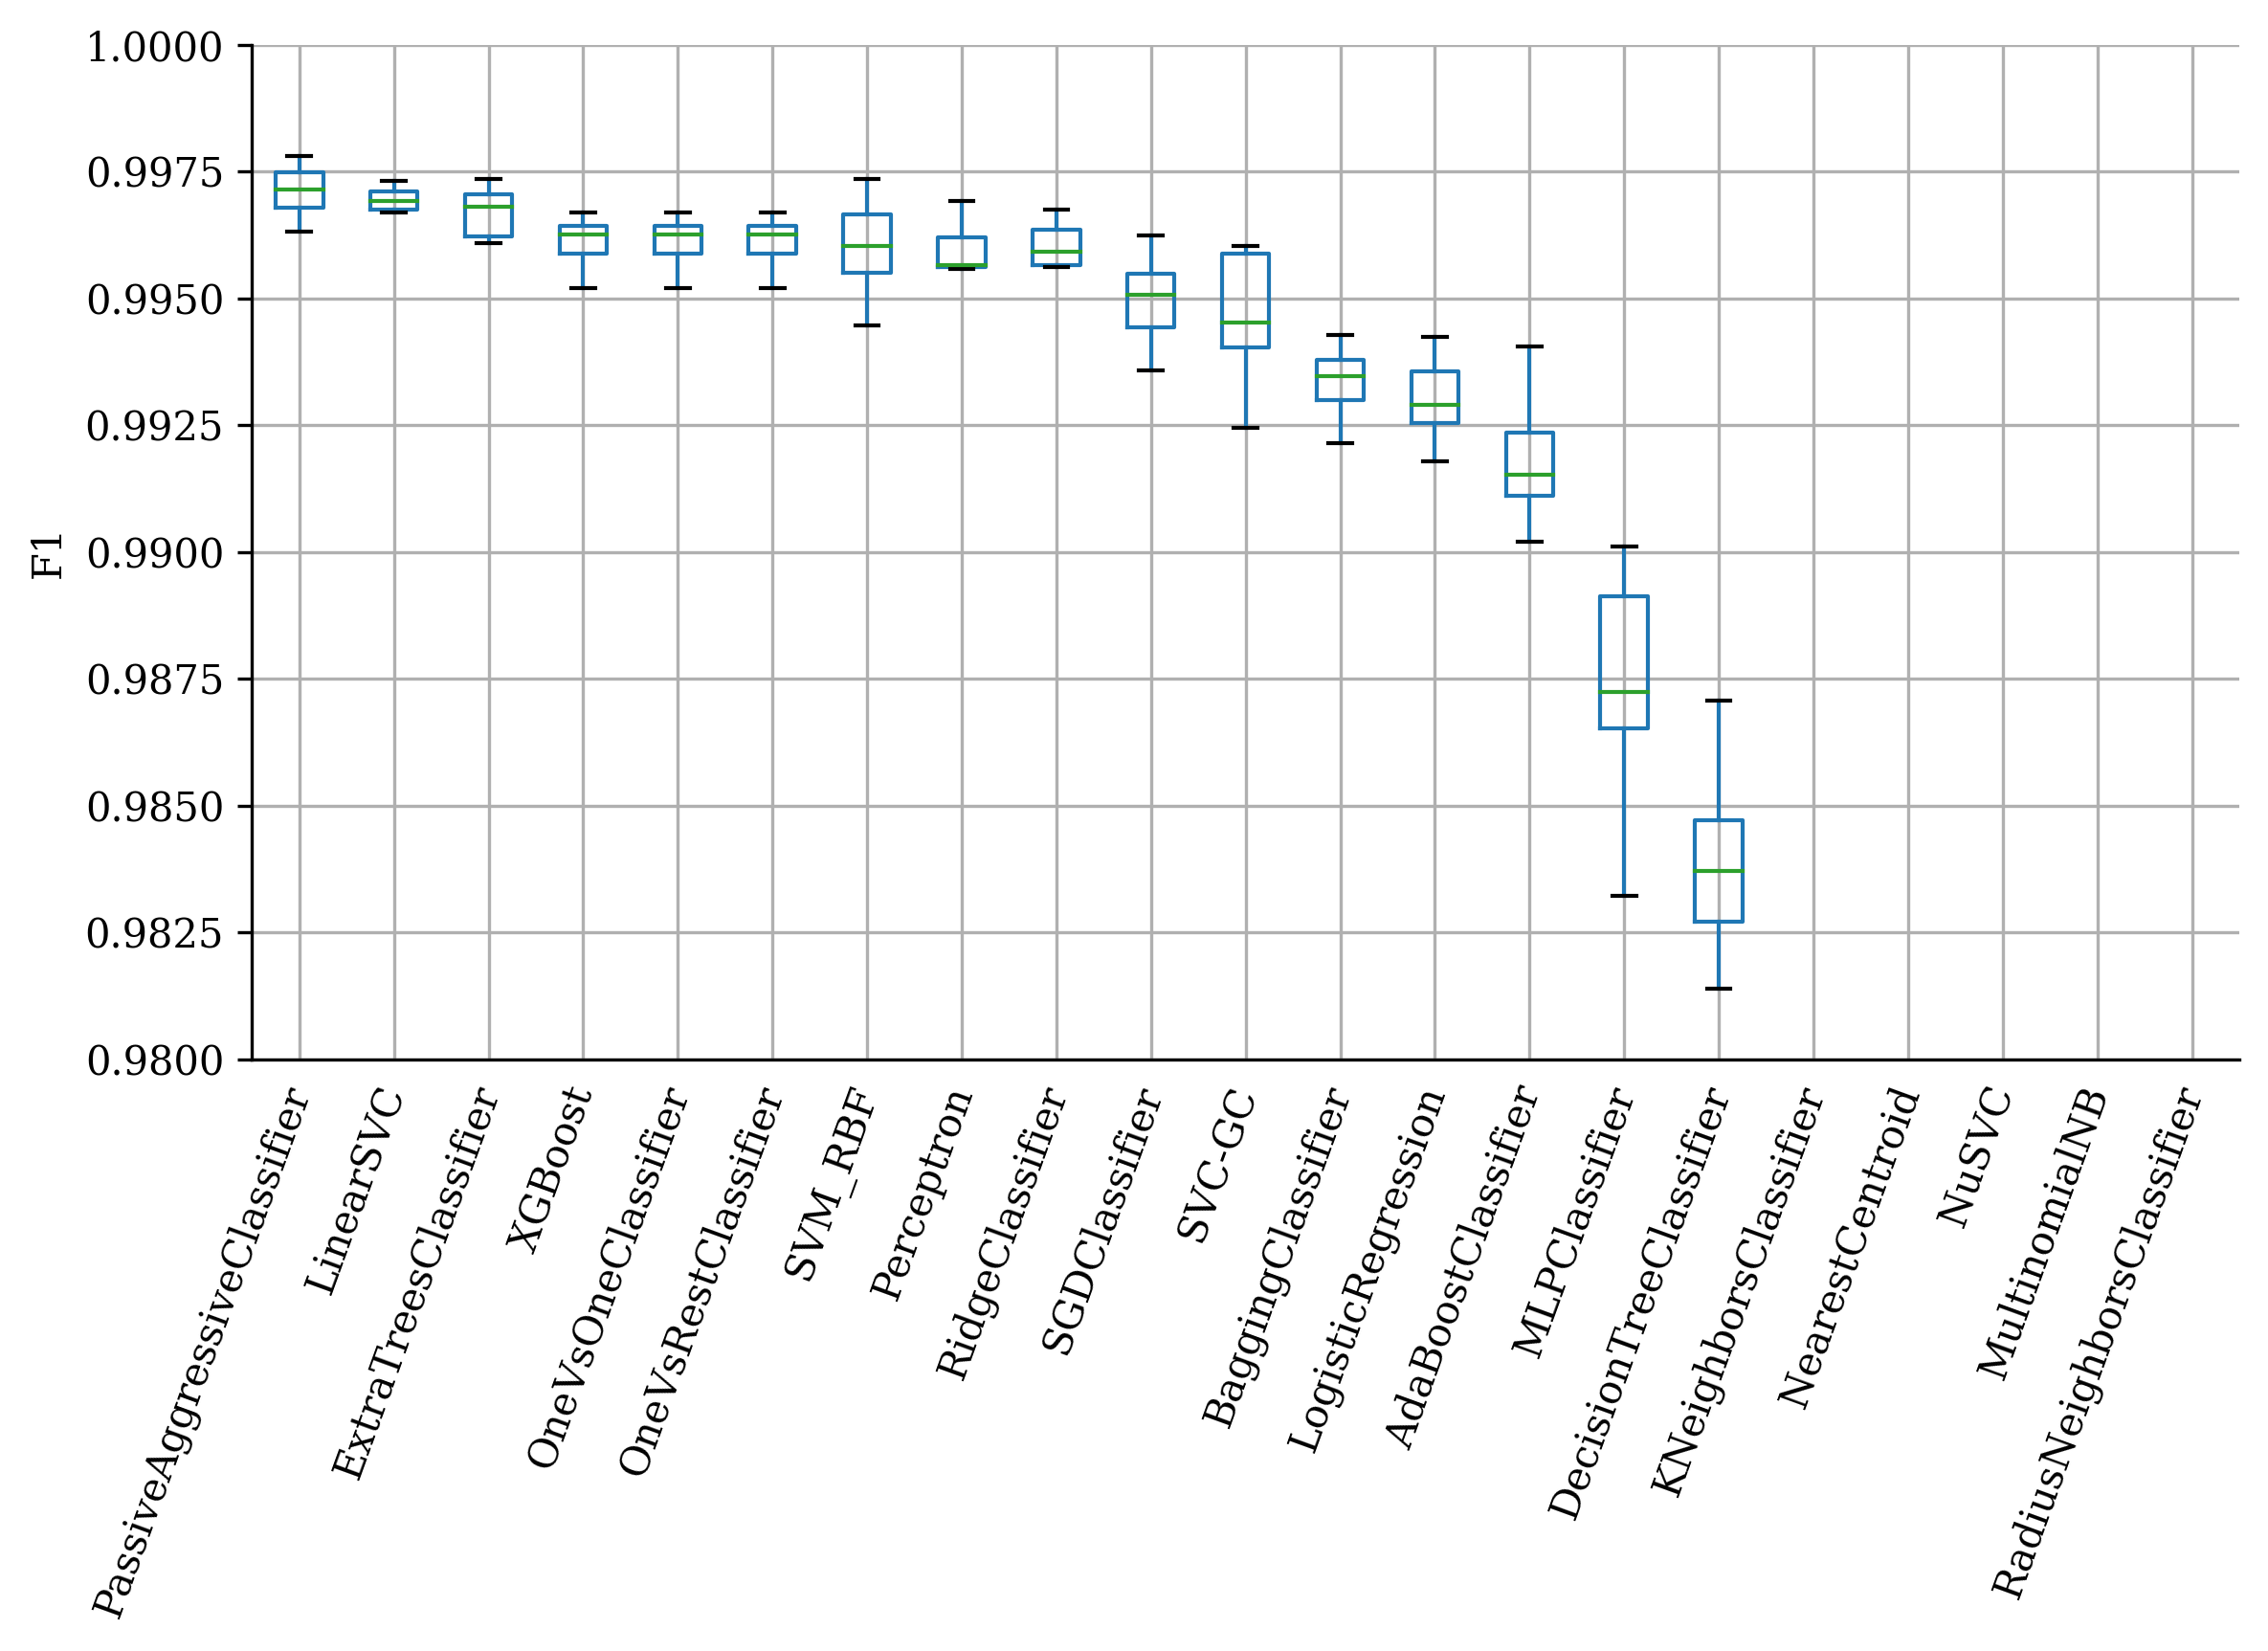

In [35]:
import matplotlib.patches as mpatches
df_small = df_all.sort_values(['f1_score'],ascending=[False])
df_small = rename_table_labels(df_small)

#order by mean F1
order_dict = {s: i for i, s in enumerate(df.sort_values(['f1_score'],ascending=[False]).loc[:,'model'])}

# Figure
current_figure_name = 'all_f1_sorted_boxplot.png'
fig, ax = plt.subplots(figsize=(8, 6))
dfbox = my_plot_errorbar(df_small,ax,'F1',order_dict=order_dict)
#plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.98, 1))
ax.set_ylabel('F1')
ax.set_xlabel('')
ax.set_title('')
fig.suptitle('')
#ax.set_yscale('log')
#ax.legend(handles=[legend_cat_1],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)
###############################


print(plt.rcParams['font.family'])

In [ ]:
print(dfbox['F1'].keys())
dfbox['F1']['whiskers'][0].get_ydata()

## All sorted (F1 and Inference time)

['DejaVu Serif']


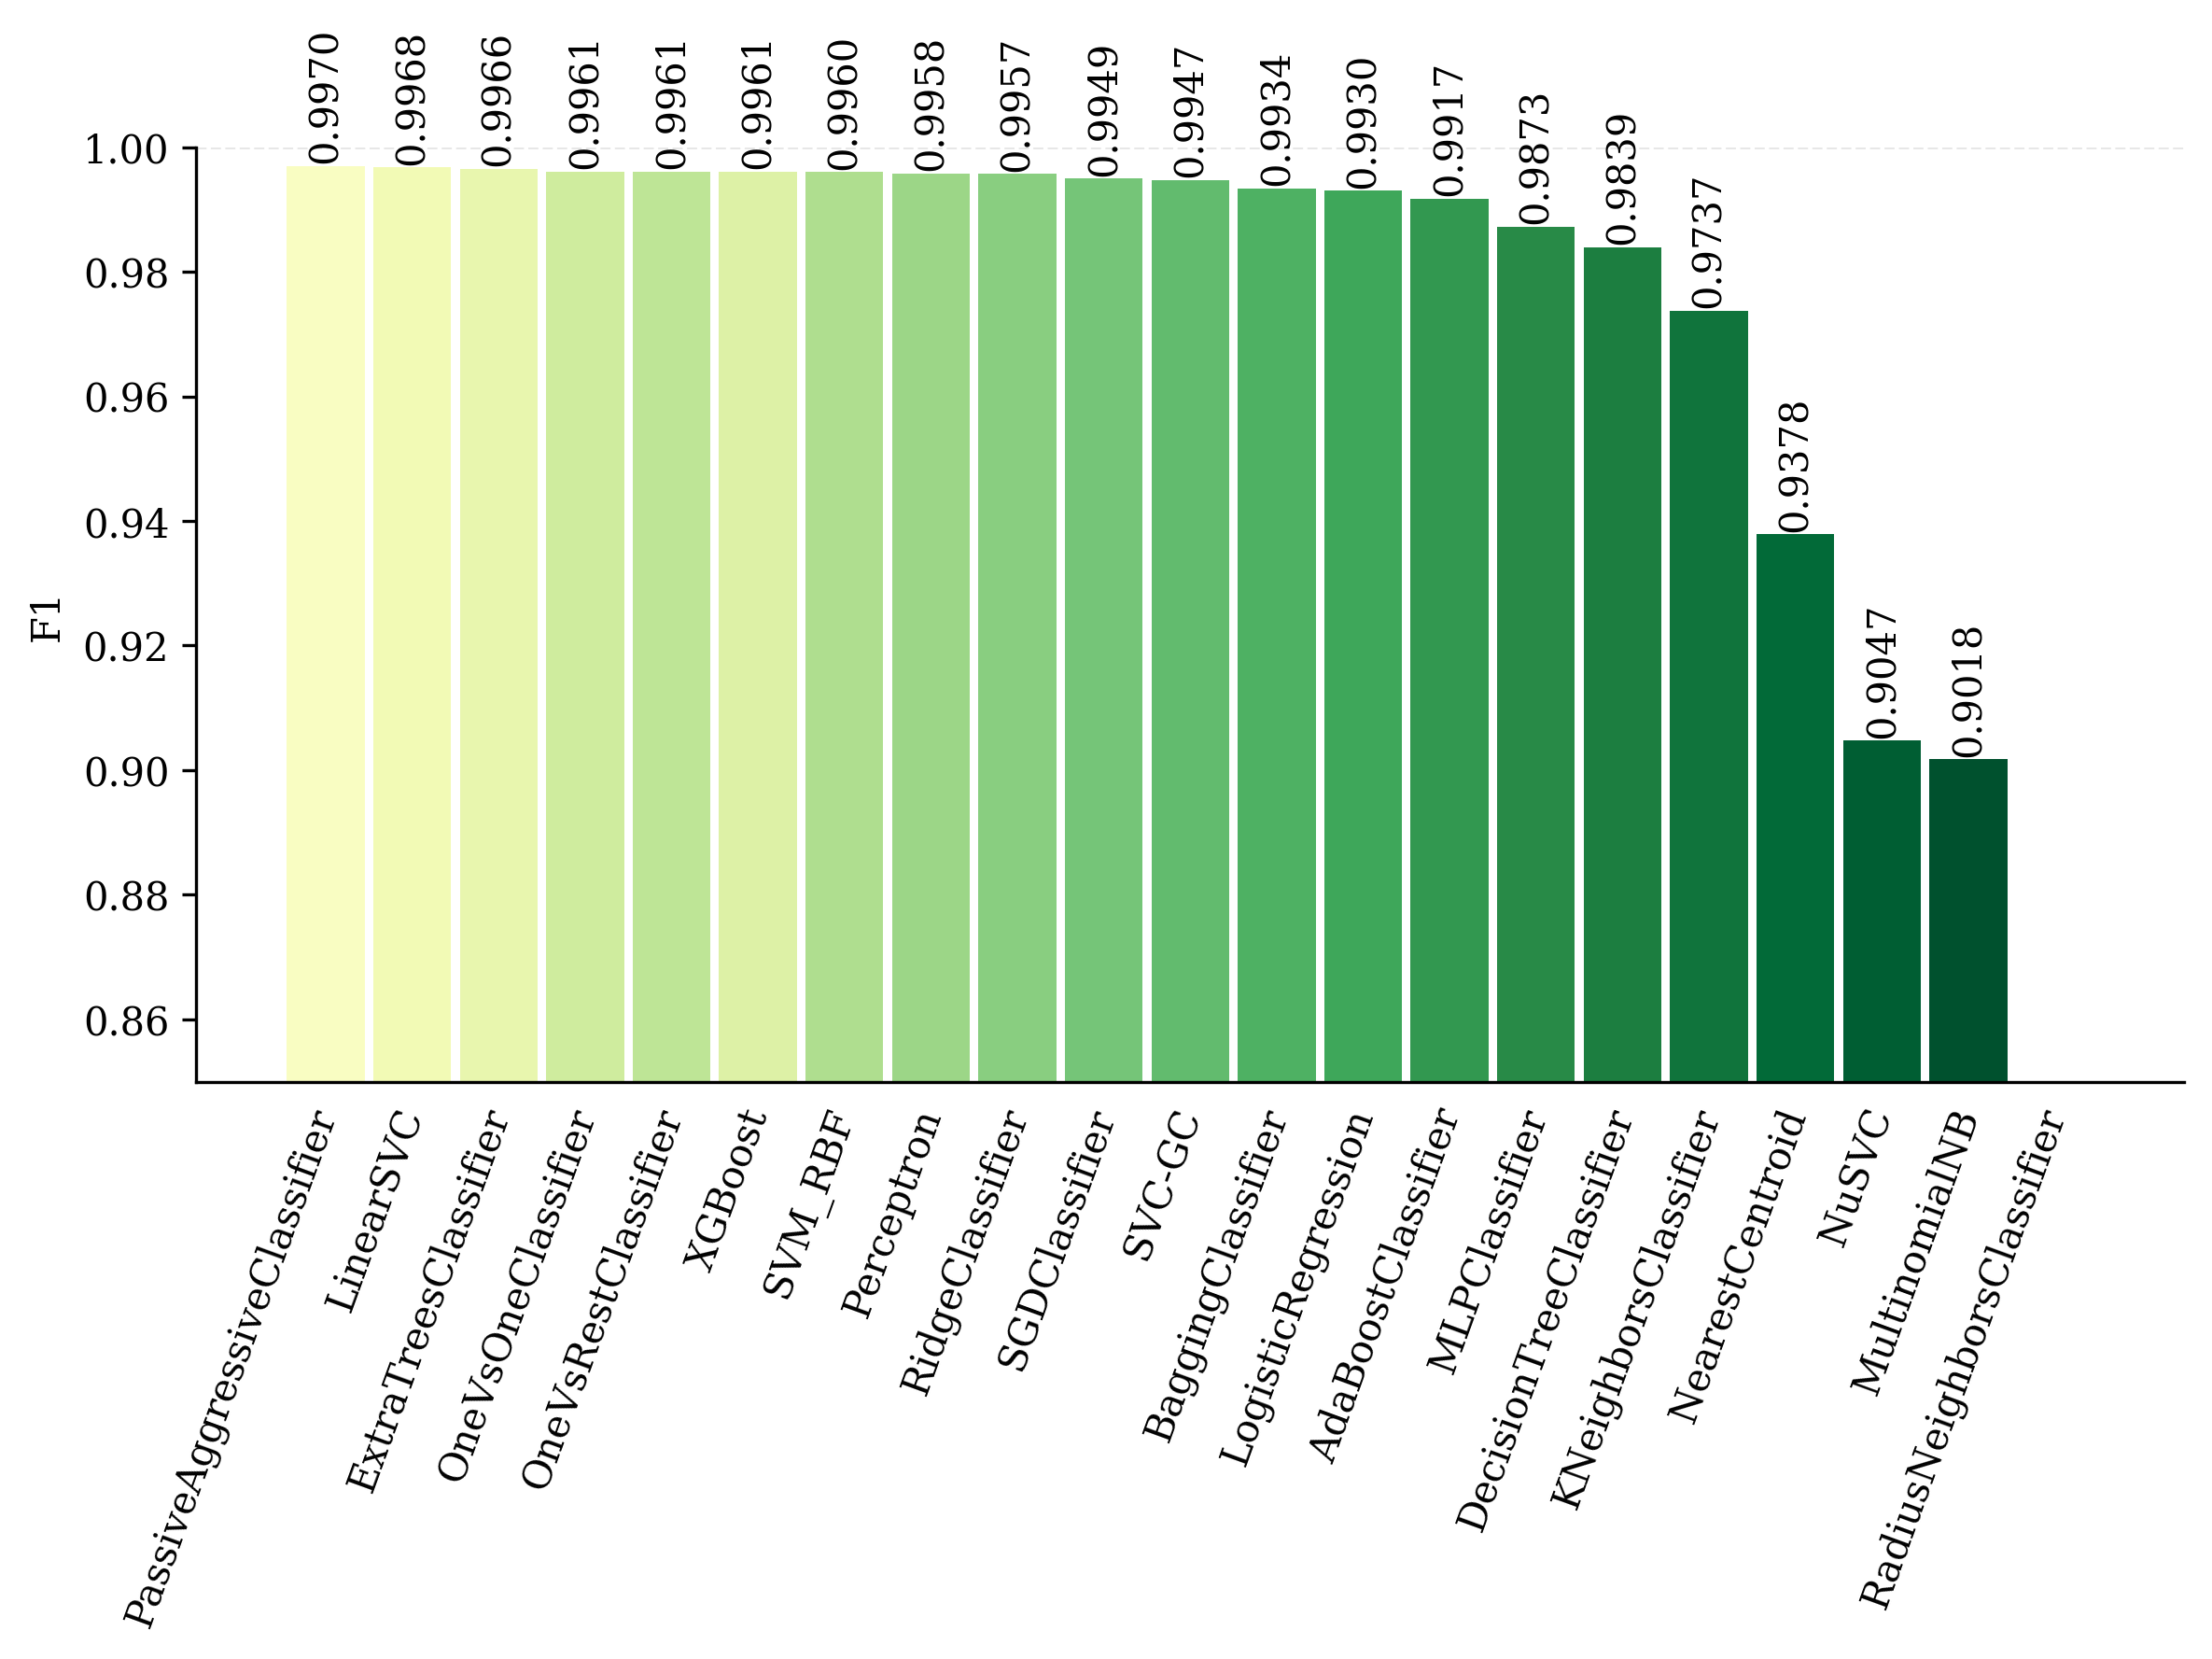

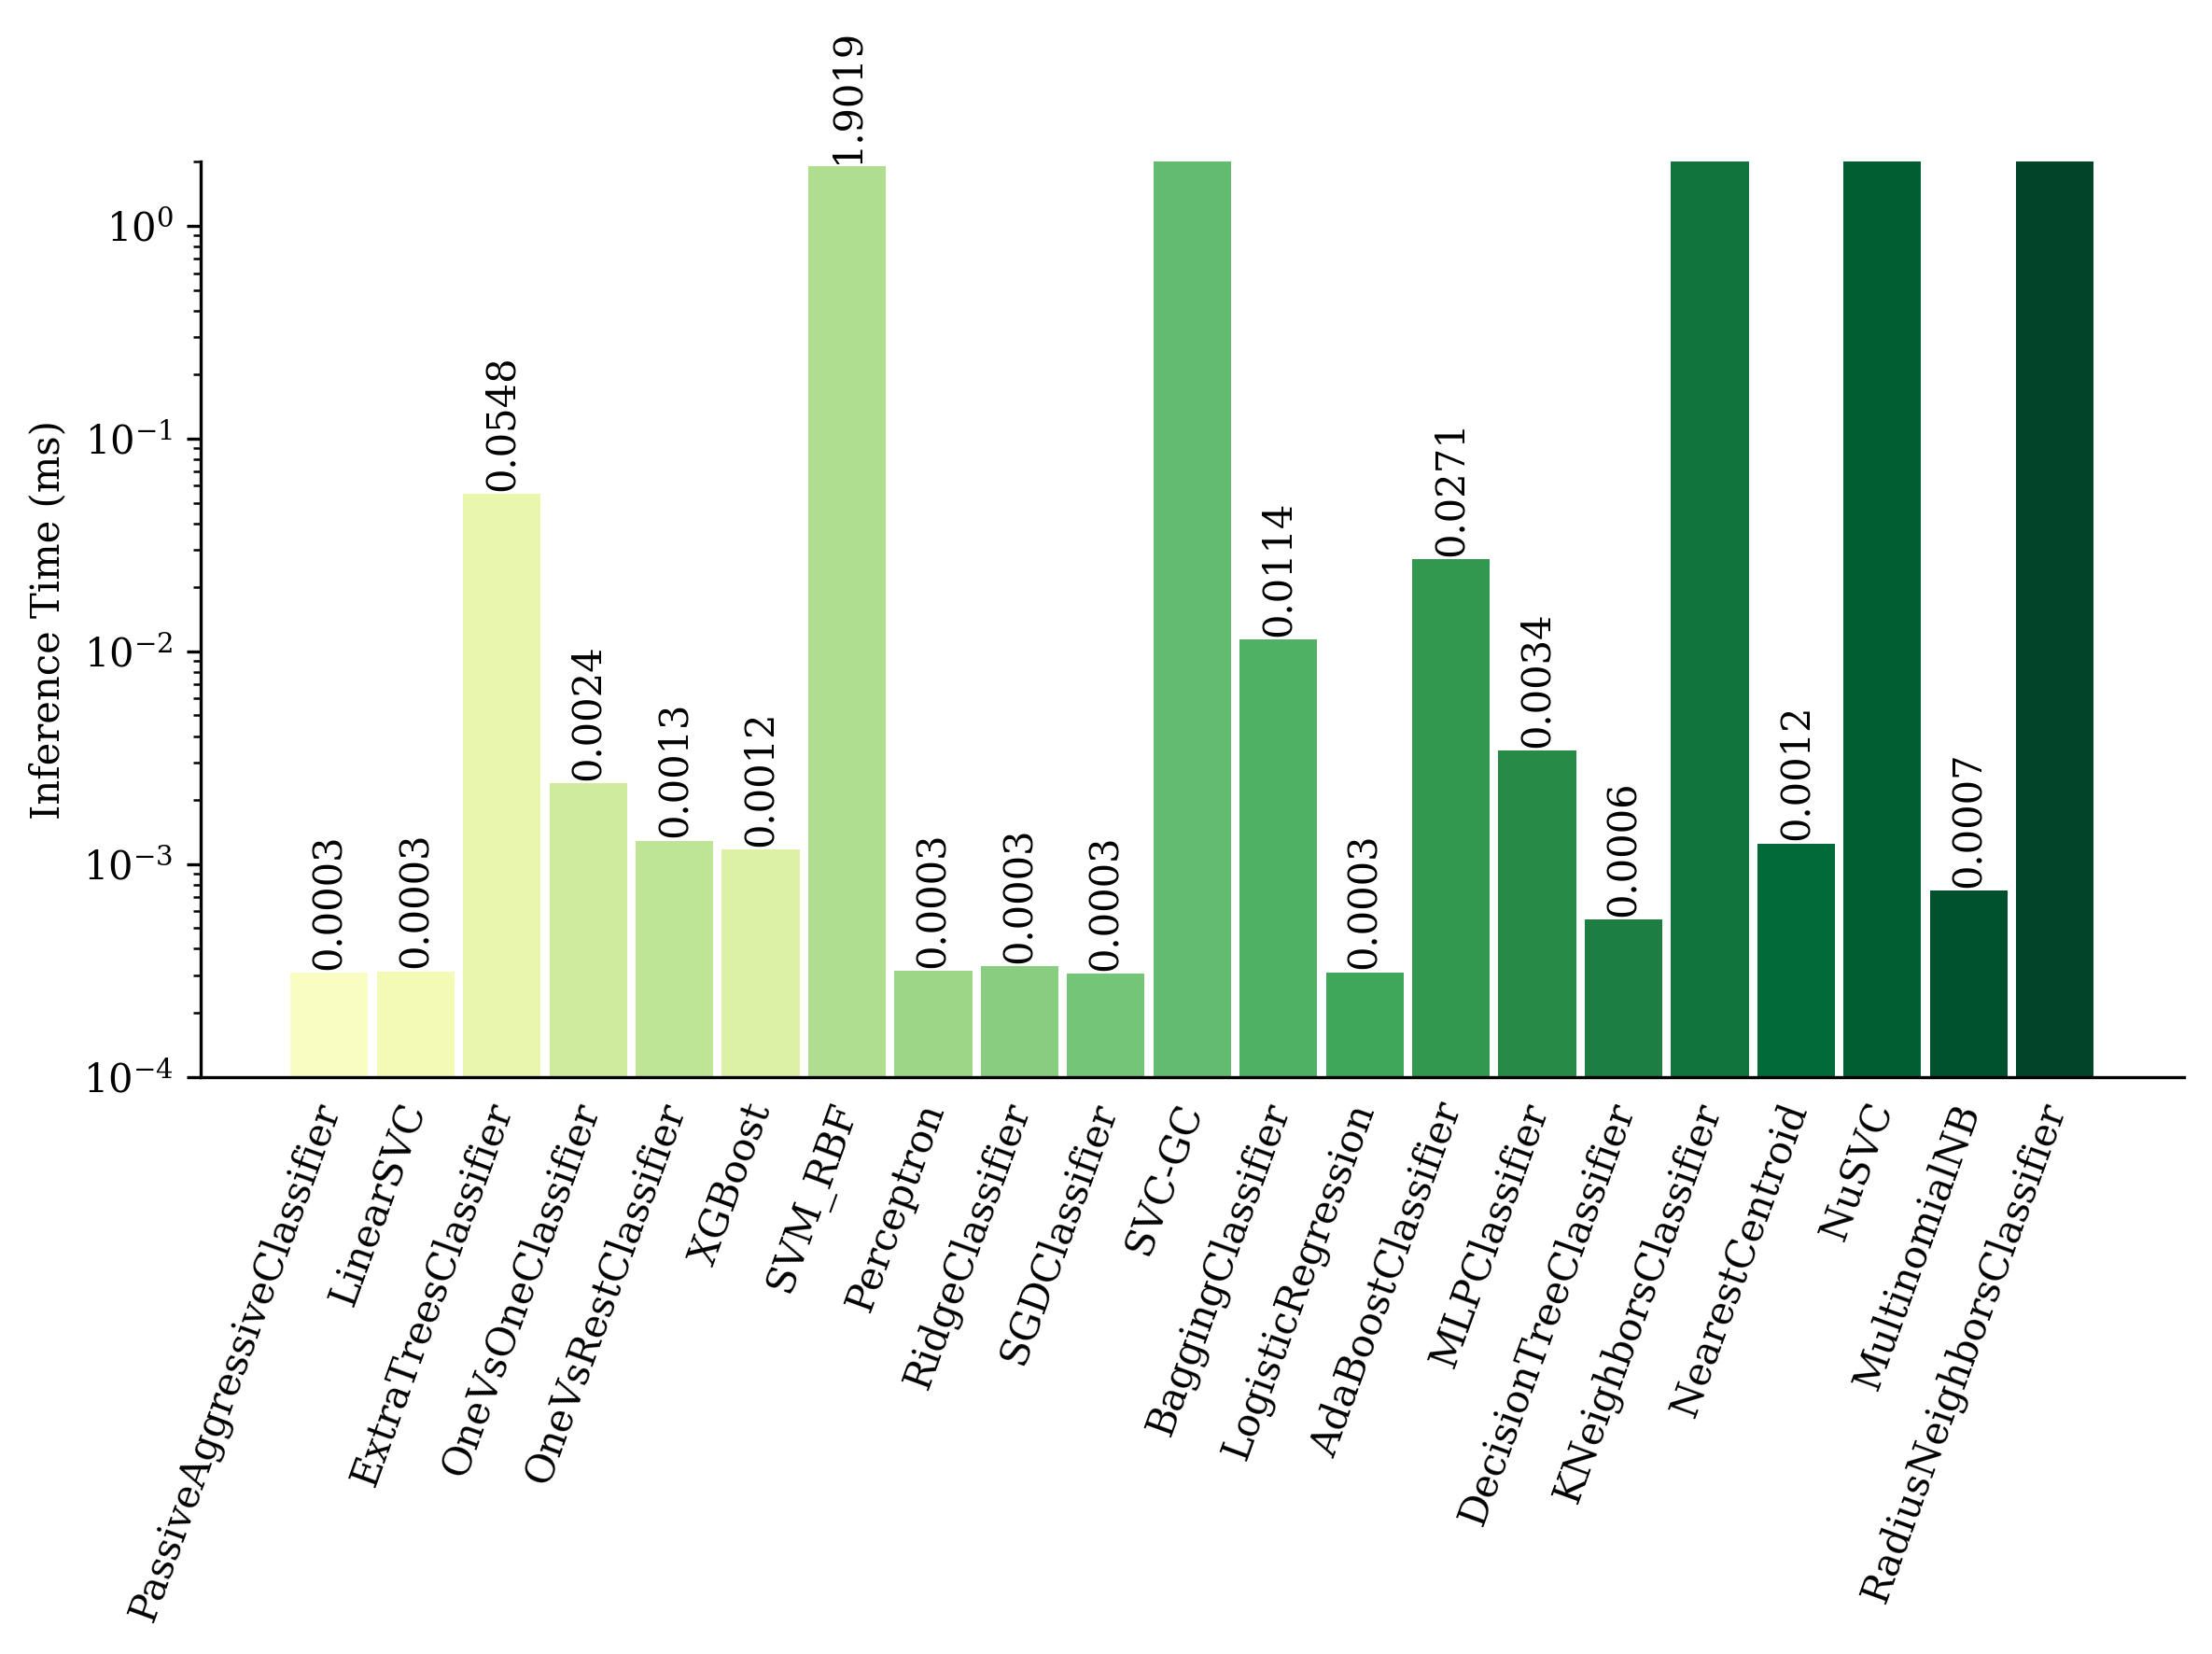

In [36]:
# method_category = 'transformer'
# metrics = ['overall_accuracy', 'precision', 'recall', 'f1', 'training time',
#        'testing time', 'color']
import matplotlib.patches as mpatches
df_small = df.sort_values(['category','f1_score'],ascending=[True, False])
df_small = rename_table_labels(df_small)
#df_small = df.loc[methods[method_category], metrics]
#df_small = df_small.sort_values(['category','f1'],ascending=[True, False])

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml']
                         .head(1)['color'].values[0], dtype=np.float32)
#color_cat_1 = tuple(matplotlib.colors.to_rgb(str(df_small[df_small['category']=='classic_ml'].head(1)['color'].values[0])))

legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')

# Figure
current_figure_name = 'all_f1_sorted_f1.png'
fig, ax = plt.subplots(figsize=(8, 6))
my_plot_bar(df_small,ax,'F1')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.85, 1))
ax.set_ylabel('F1')
#ax.legend(handles=[legend_cat_1],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)
###############################
current_figure_name = 'all_f1_sorted_inference_time.png'
fig, ax = plt.subplots(figsize=(8, 6))
my_plot_bar(df_small,ax,'Inference Time (ms)')
ax.set(ylim=(0.0001, 2))
ax.set_yscale('log')
ax.set_ylabel('Inference Time (ms)')
#ax.legend(handles=[legend_cat_1],  loc='lower right')
fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

print(plt.rcParams['font.family'])

## Classical ML

In [37]:
def process_style_to_my_latex_format(df_latex):
  # returns style object

  s = df_latex.style
  s = s.format(precision=5, escape="latex")
  return s

In [38]:
# Table: Single NLP
table_name = "single"
caption="Detection accuracy and inference speed of the models for SQL injection. The time unit is milliseconds per sample, calculated by averaging the total time over the analyzed dataset size."
out_file_name = (table_folder / table_name).with_suffix('.tex')
method_cat = 'classic_ml'
metrics = ['accuracy', 'precision', 'recall', 'f1_score','tp','tn','fp','fn', 'train_time',
       'pred_time', 'color', 'category', 'Method']

df_small = df.loc[df['category']==method_cat,metrics]

df_small = rename_table_labels(df_small)
#df_small.rename(columns={"Inference Time (ms)": "Inference Time\n(ms per sample)", "Training Time (ms)": "Training Time\n(ms per sample)"}, inplace=True)
df_small.set_index('Method', inplace=True)
#print(df_small)

s = process_style_to_my_latex_format(df_small.drop(['color', 'category'], axis=1 ))

s = s.highlight_max(props='textbf:--rwrap;', subset=s.columns[0:-4])
s = s.highlight_min(props='textbf:--rwrap;', subset=s.columns[-4:])
s = s.format(precision=0, subset=s.columns[-6:-2])

if SAVE_OUTPUTS:
    s.to_latex(buf=out_file_name,
       column_format="lrrrrrrrrrr", position="htbp", position_float="centering",
       hrules=True, label=f"tab:{table_name}", caption=caption)

print(s.to_latex(
    column_format="lrrrrrrrrrr", position="ht", position_float="centering",
    hrules=True, label=f"table:{table_name}", caption=caption)
)
#df.loc[:,"training time"] / df.loc[:,"train size"]
#(df.loc[:,["training time", "testing time"]]*1000).div(df.loc[:,["train size", "test size"]])

\begin{table}[ht]
\centering
\caption{Detection accuracy and inference speed of the models for SQL injection. The time unit is milliseconds per sample, calculated by averaging the total time over the analyzed dataset size.}
\label{table:single}
\begin{tabular}{lrrrrrrrrrr}
\toprule
 & Accuracy & Precision & Recall & F1 & TP & TN & FP & FN & Training Time (ms) & Inference Time (ms) \\
Method &  &  &  &  &  &  &  &  &  &  \\
\midrule
AdaBoostClassifier & 0.99389 & 0.99645 & 0.98708 & 0.99174 & 2245 & 3839 & 8 & 29 & 0.92655 & 0.02713 \\
BaggingClassifier & 0.99513 & 0.99721 & 0.98967 & 0.99342 & 2251 & 3841 & 6 & 24 & 2.91532 & 0.01137 \\
DecisionTreeClassifier & 0.98821 & 0.99564 & 0.97251 & 0.98393 & 2212 & 3838 & 10 & 62 & 0.07496 & 0.00055 \\
ExtraTreesClassifier & 0.99745 & 0.99964 & 0.99350 & 0.99656 & 2260 & 3846 & 1 & 15 & 0.77023 & 0.05481 \\
KNeighborsClassifier & 0.98064 & 0.98164 & 0.96598 & 0.97374 & 2197 & 3806 & 41 & 77 & 0.00030 & 30.86392 \\
LinearSVC & 0.99762 & 0.99956

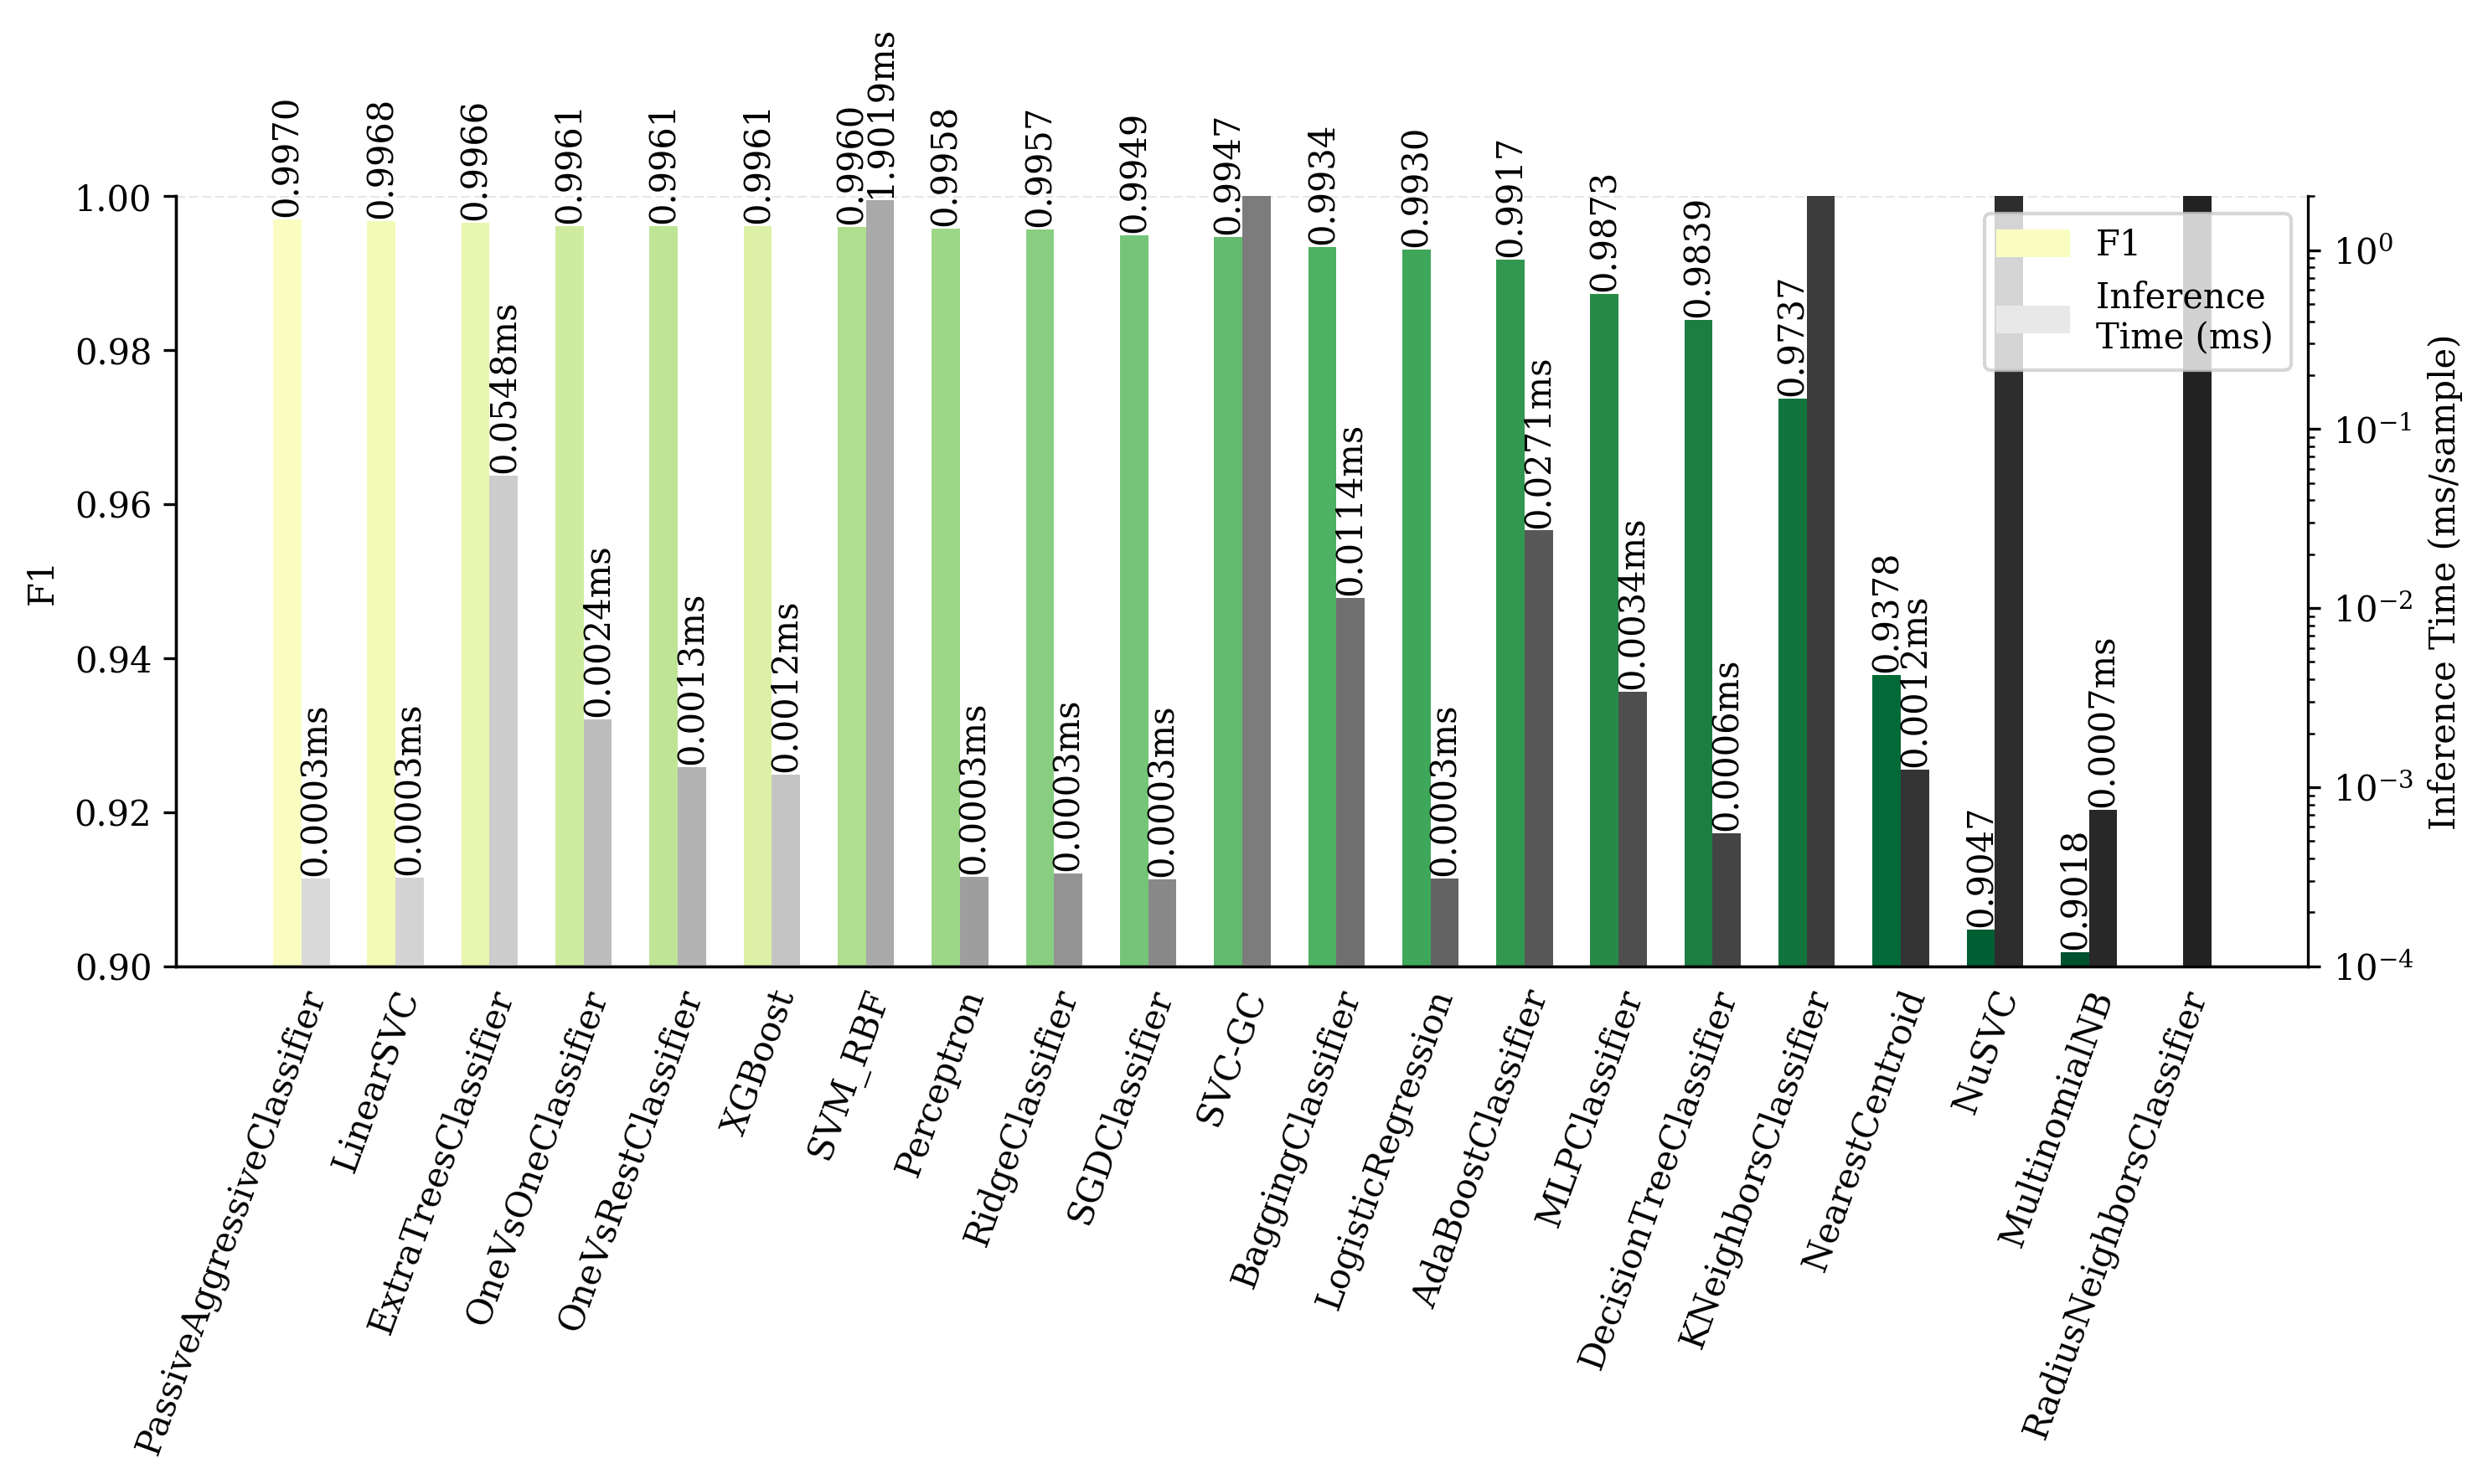

In [39]:
# Figure of Table Single NLP
current_figure_name = 'single_nlp_f1_vs_time.png'
fig, ax = plt.subplots( figsize=(10,6))

metric = ['F1', 'Inference Time (ms)']
df_small = df_small.sort_values(metric,ascending=False)

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml']
                         .head(1)['color'].values[0], dtype=np.float32)
color_cat_1G = color_cat_1.copy()
color_cat_1G[0:3] = color_cat_1G[0:3].mean()

legend_cat_1 = mpatches.Patch(color=color_cat_1, label=metric[0])
legend_cat_1G = mpatches.Patch(color=color_cat_1G, label='Inference \nTime (ms)')


df_small.reset_index(inplace=True)
_, ax2 = my_plot_twin_bar(df_small,ax,metric)
ax.axhline(1,  linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.90, 1))
ax.set_ylabel('F1')

ax2.set_ylabel('Inference Time (ms/sample)')
ax2.set(ylim=(0.0001, 2))
ax2.set_yscale('log')
ax2.legend(handles=[legend_cat_1, legend_cat_1G],  loc='upper right')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax2.get_figure().savefig(figure_folder / current_figure_name)


## All methods FE vs alpha

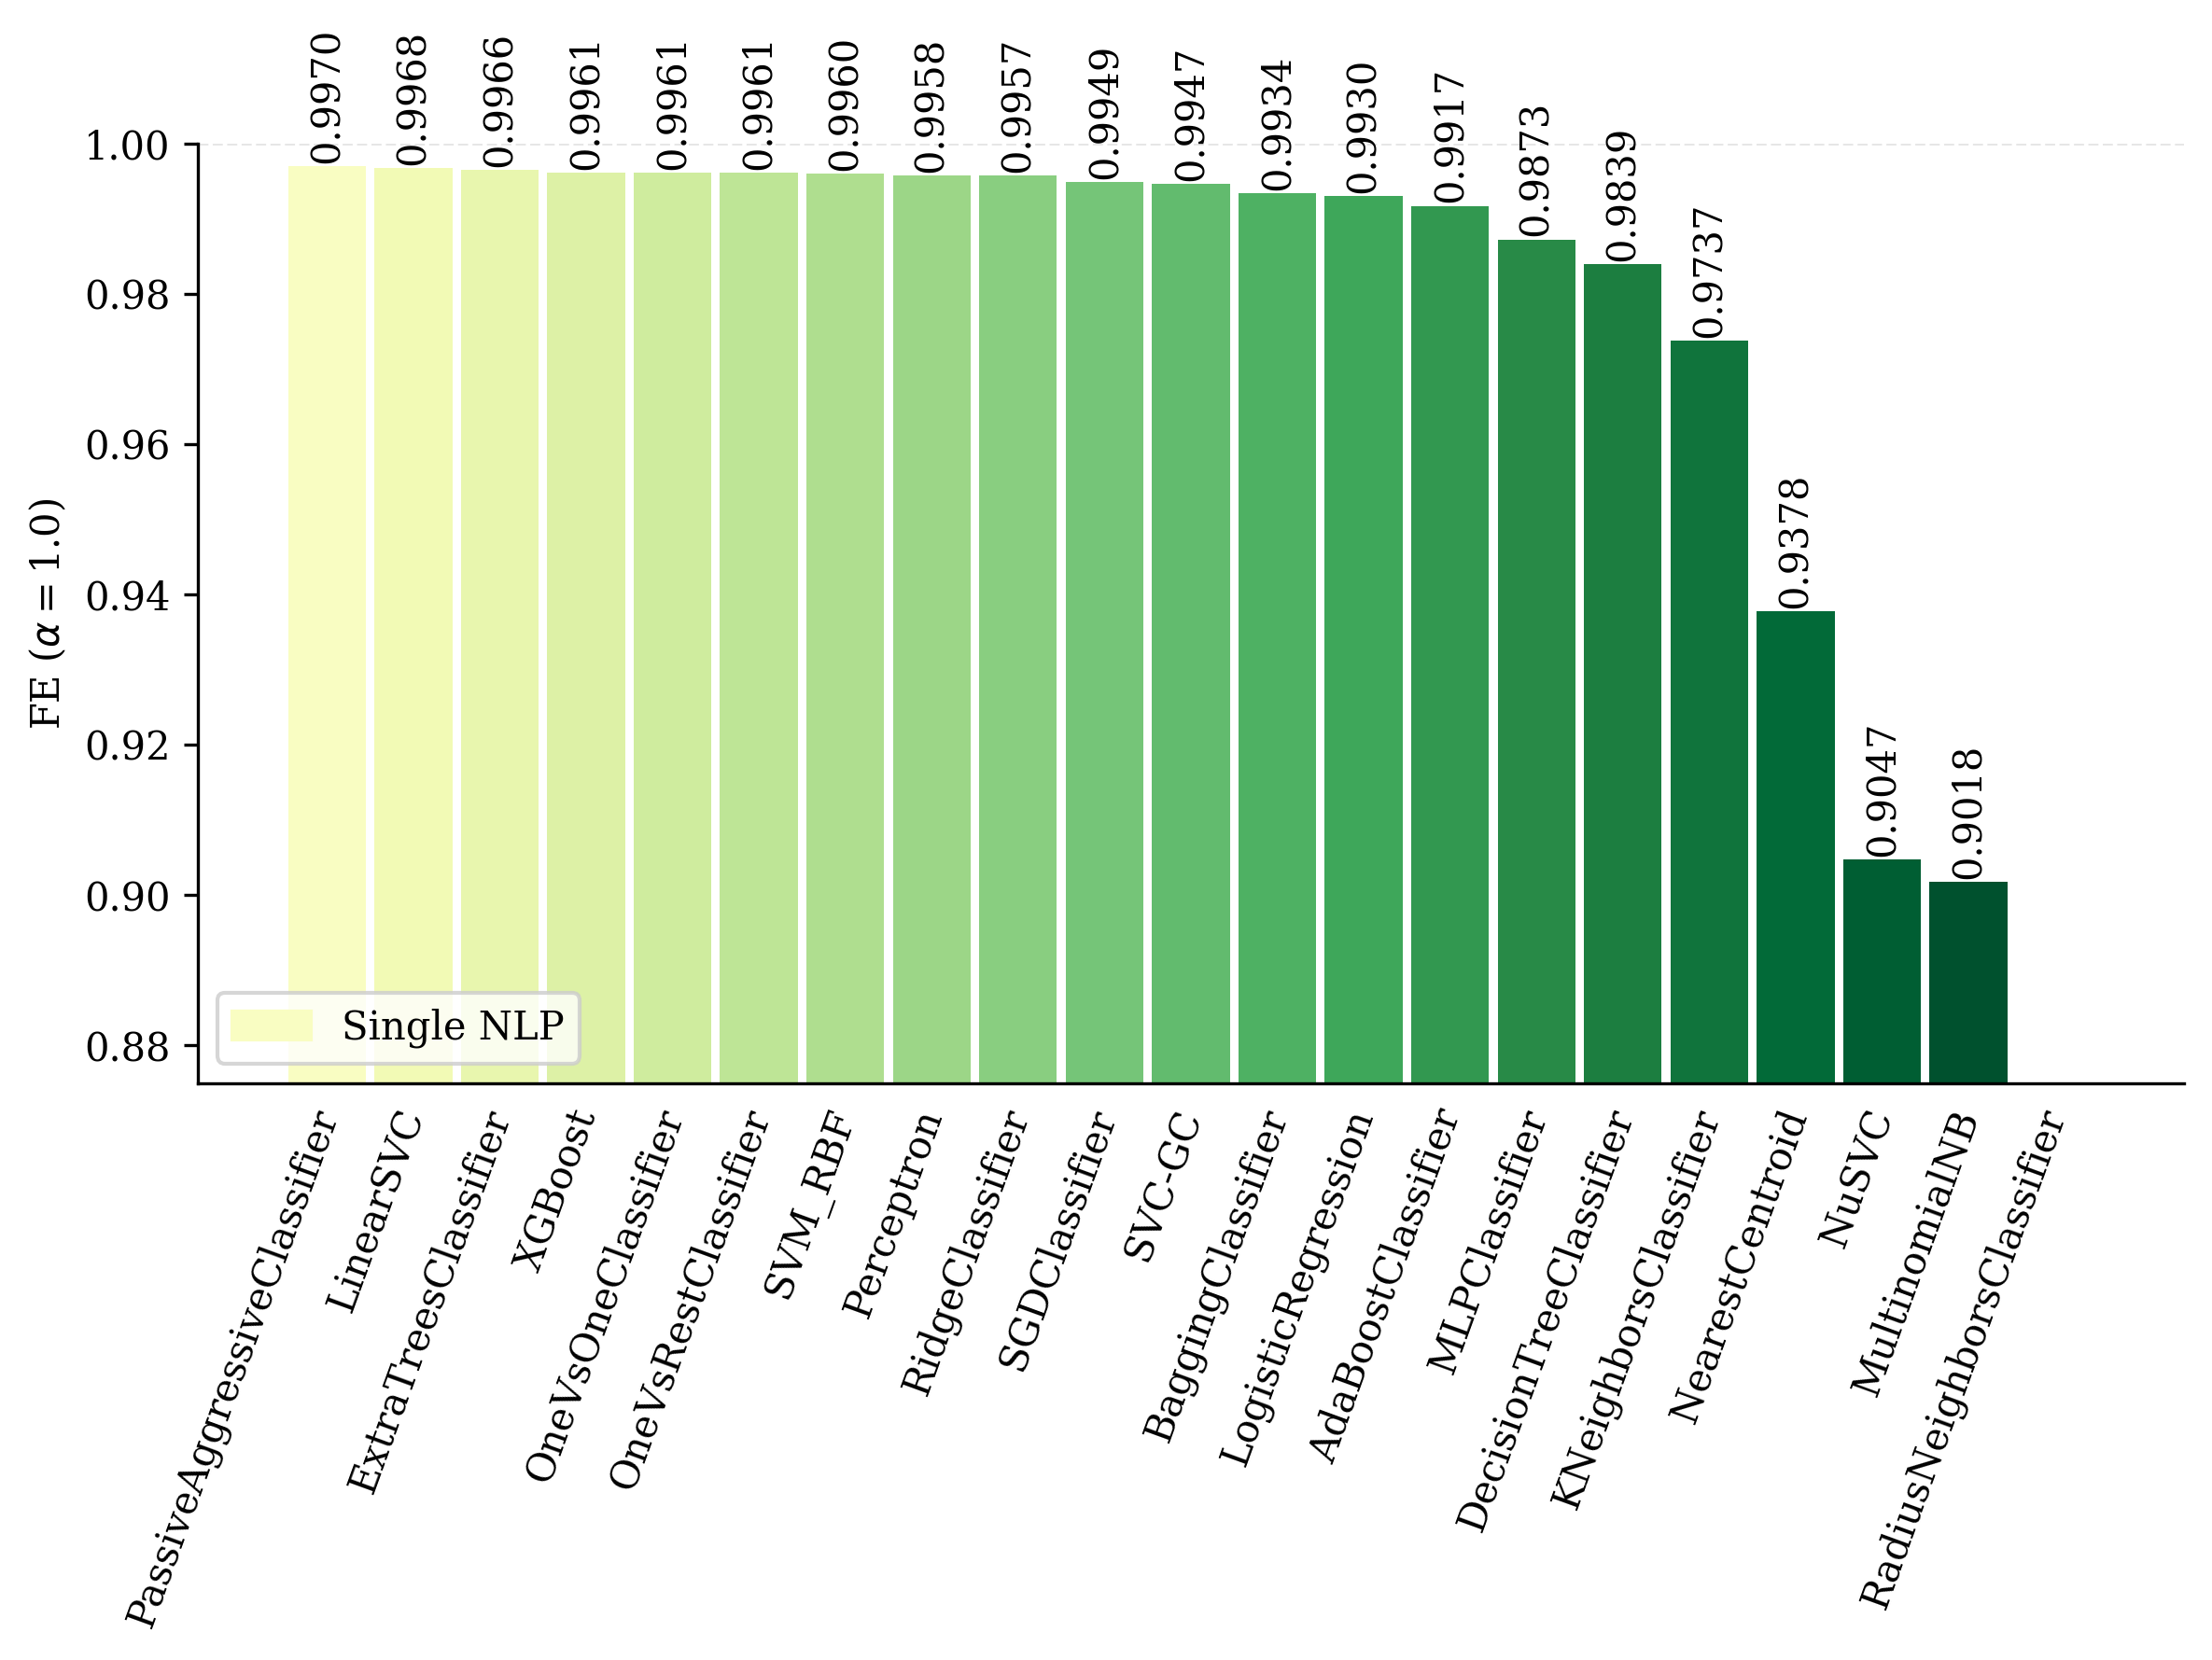

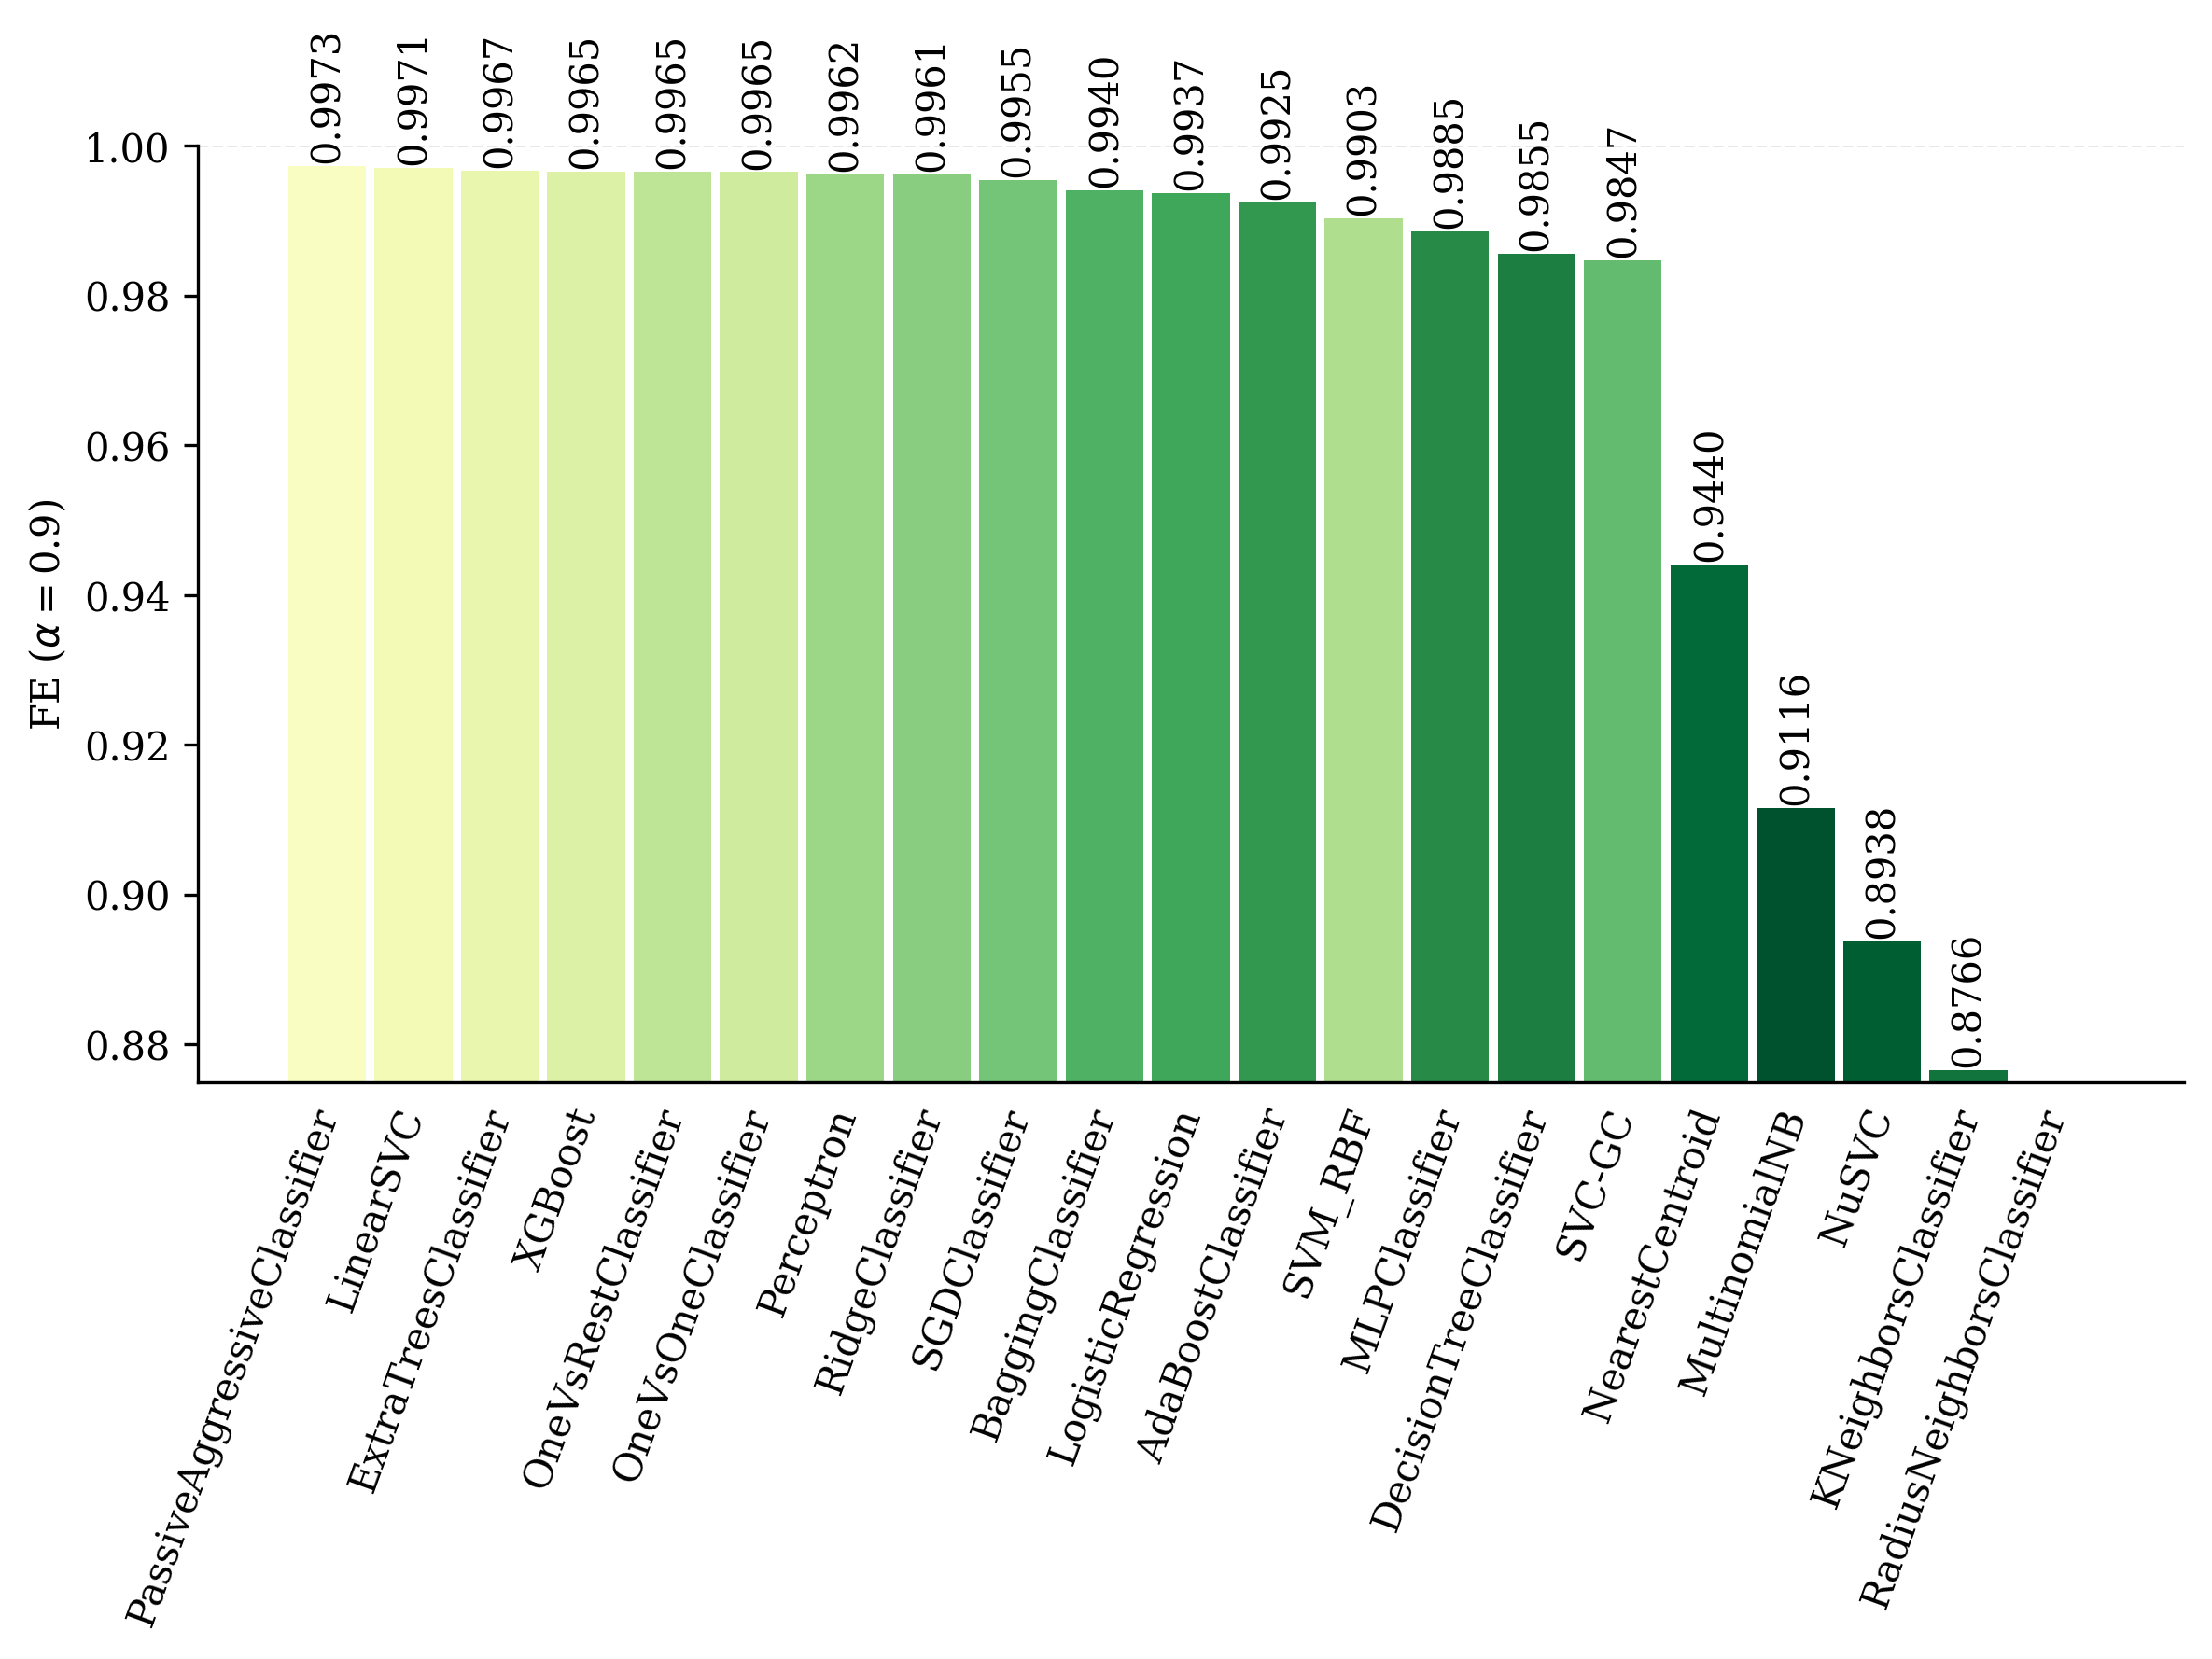

In [40]:
#ALL FE comparison for different alpha
from sklearn import preprocessing

current_figure_name = 'all_nlp_FE_alpha_100.png'

#df_small = df.sort_values(['category','f1'],ascending=[True, False])
df_small = df.sort_values('f1_score',ascending=False)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(1.0000 - df_small['pred_time'].to_numpy().reshape(-1, 1))
df_small['inference scaled'] = x_scaled

alpha = 1.0
#alpha=1.00 #emphasis on F1 rather than speed
df_small['FE_100'] = alpha*df_small['f1_score'] + (1-alpha)*df_small['inference scaled']
#print(df_small)
alpha = 0.90
df_small['FE_090'] = alpha*df_small['f1_score'] + (1-alpha)*df_small['inference scaled']

df_small = rename_table_labels(df_small)



# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml']
                         .head(1)['color'].values[0], dtype=np.float32)
legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')

# Figure
fig, ax = plt.subplots(figsize=(8, 6))
df_small = df_small.sort_values('FE_100',ascending=False)

my_plot_bar(df_small,ax,'FE_100')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)

ax.set_ylabel('FE'+ r' ($\alpha=$' + f'{1.0})')
#ax.set_xlabel(r'$\alpha=$' + f'{alpha}')
ax.set(ylim=(0.875, 1))
ax.legend(handles=[legend_cat_1],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

#########################
current_figure_name = 'all_nlp_FE_alpha_090.png'
fig, ax = plt.subplots(figsize=(8, 6))
df_small = df_small.sort_values('FE_090',ascending=False)
my_plot_bar(df_small,ax,'FE_090')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set_ylabel('FE'+ r' ($\alpha=$' + f'{0.90})')
#ax.set_xlabel()
ax.set(ylim=(0.875, 1))
#ax.legend(handles=[legend_cat_1],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

## Scatter plots

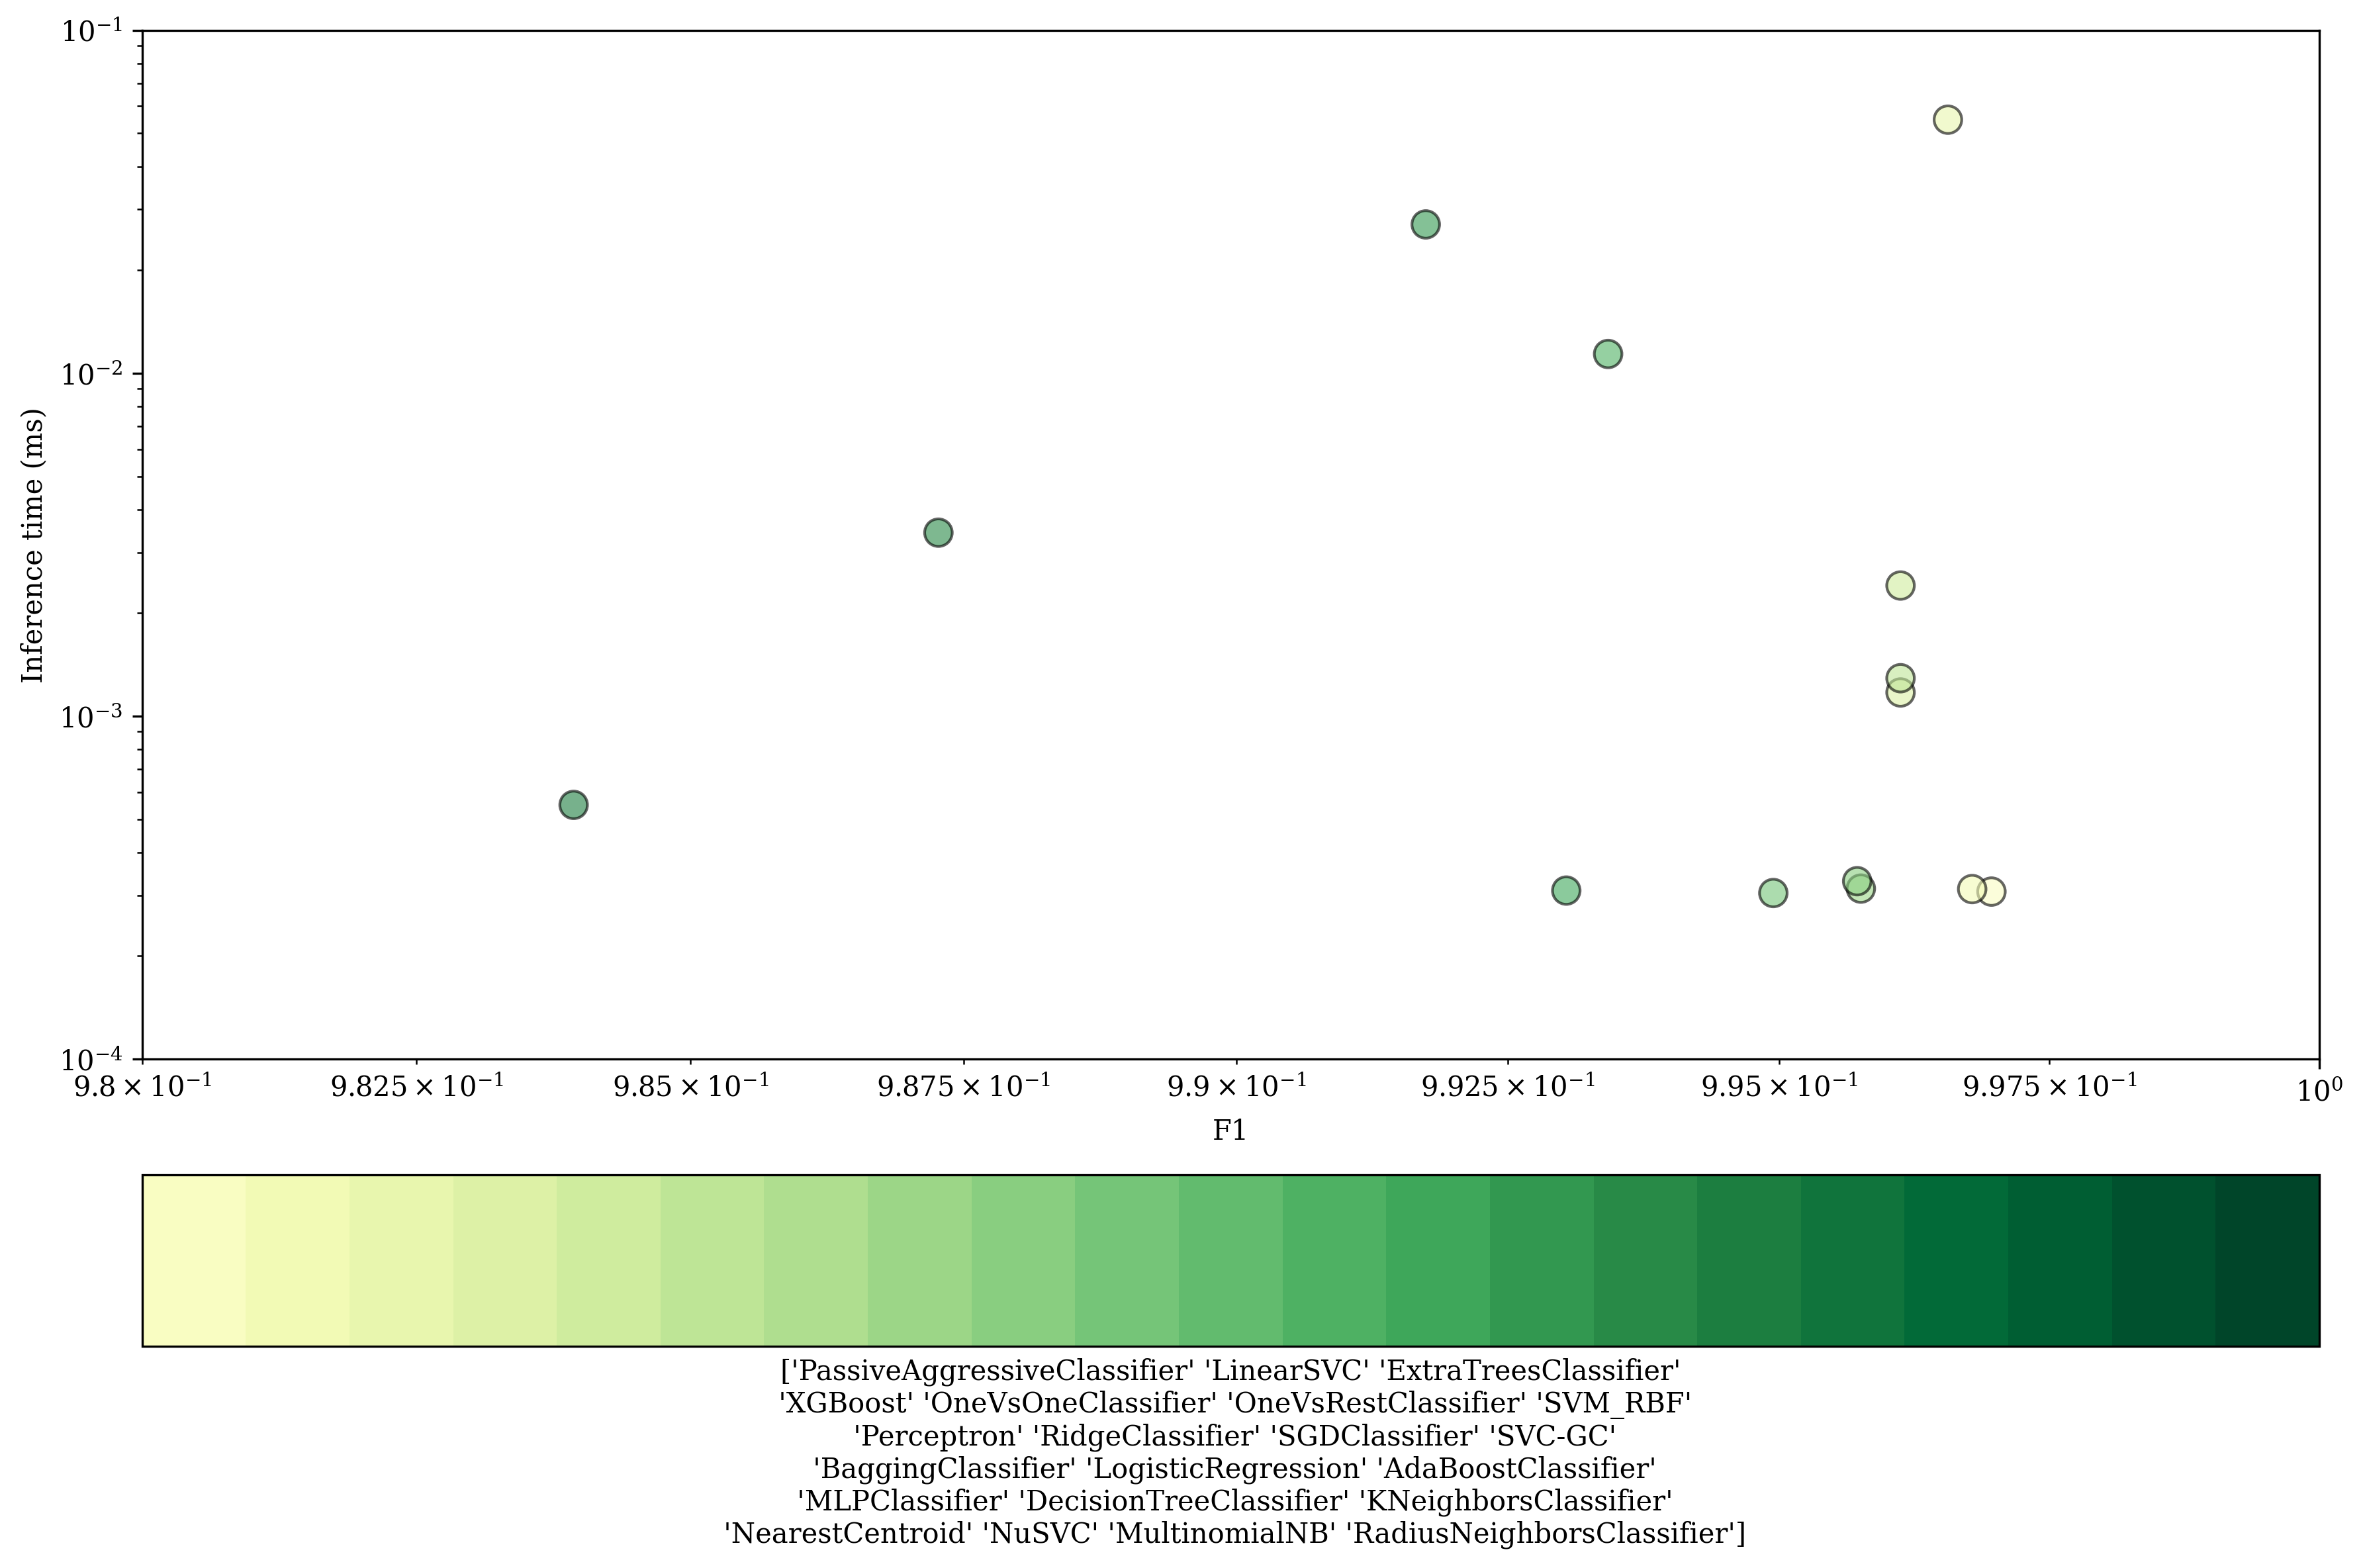

In [41]:
#Scatter plot speed vs F1
from sklearn import preprocessing

current_figure_name = 'speed_vs_f1_scatter.png'

#df_small = df.sort_values(['category','f1'],ascending=[True, False])
df_small = df.sort_values('f1_score',ascending=False)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(1.0000 - df_small['pred_time'].to_numpy().reshape(-1, 1))
df_small['inference scaled'] = x_scaled
f1 = df_small['f1_score']
t_pred = df_small['pred_time']

#colors = df_small.loc[:,'color'].values
#colors = [list(colors[i][0]) for i in range(len(colors))]

colors = df_small.loc[:, 'color'].values.tolist()
colors = [list(color) if isinstance(color, np.ndarray) else [color] for color in colors]


df_small = rename_table_labels(df_small)

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml']
                         .head(1)['color'].values[0], dtype=np.float32)

legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')

# Figure
#fig, ax = plt.subplots(figsize=(7, 4))
fig, (ax, ax2) = plt.subplots(2, figsize=(12, 8), gridspec_kw={'height_ratios': [6, 1]})
#my_plot_bar(df_small,ax,'FE_100')
ax.scatter(f1, t_pred, s=100, alpha=0.6, edgecolor='black', linewidth=1, color=colors)

#ax.set(ylim=(0.0002133462738189675, 0.015607442342392))
ax.set(xlim=(0.98, 1))
ax.set(ylim=(0.0001, 0.1))
ax.set_ylabel('Inference time (ms)')
ax.set_yscale('log')
ax.set_xlabel('F1')
ax.set_xscale('log')
#ax.set_xlabel(r'$\alpha=$' + f'{alpha}')
#ax.legend(handles=[legend_cat_1],  loc='lower left')
ticks = df_small.Method.values
cmap = (matplotlib.colors.ListedColormap(colors))
cbar = plt.colorbar(
    matplotlib.cm.ScalarMappable(cmap=cmap),
    cax=ax2,
    #extend='both',
    ticks=None,
    #spacing='proportional',
    orientation='horizontal',
    label=str(ticks),
)
cbar.ax.tick_params(size=0)
cbar.set_ticks([])

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)



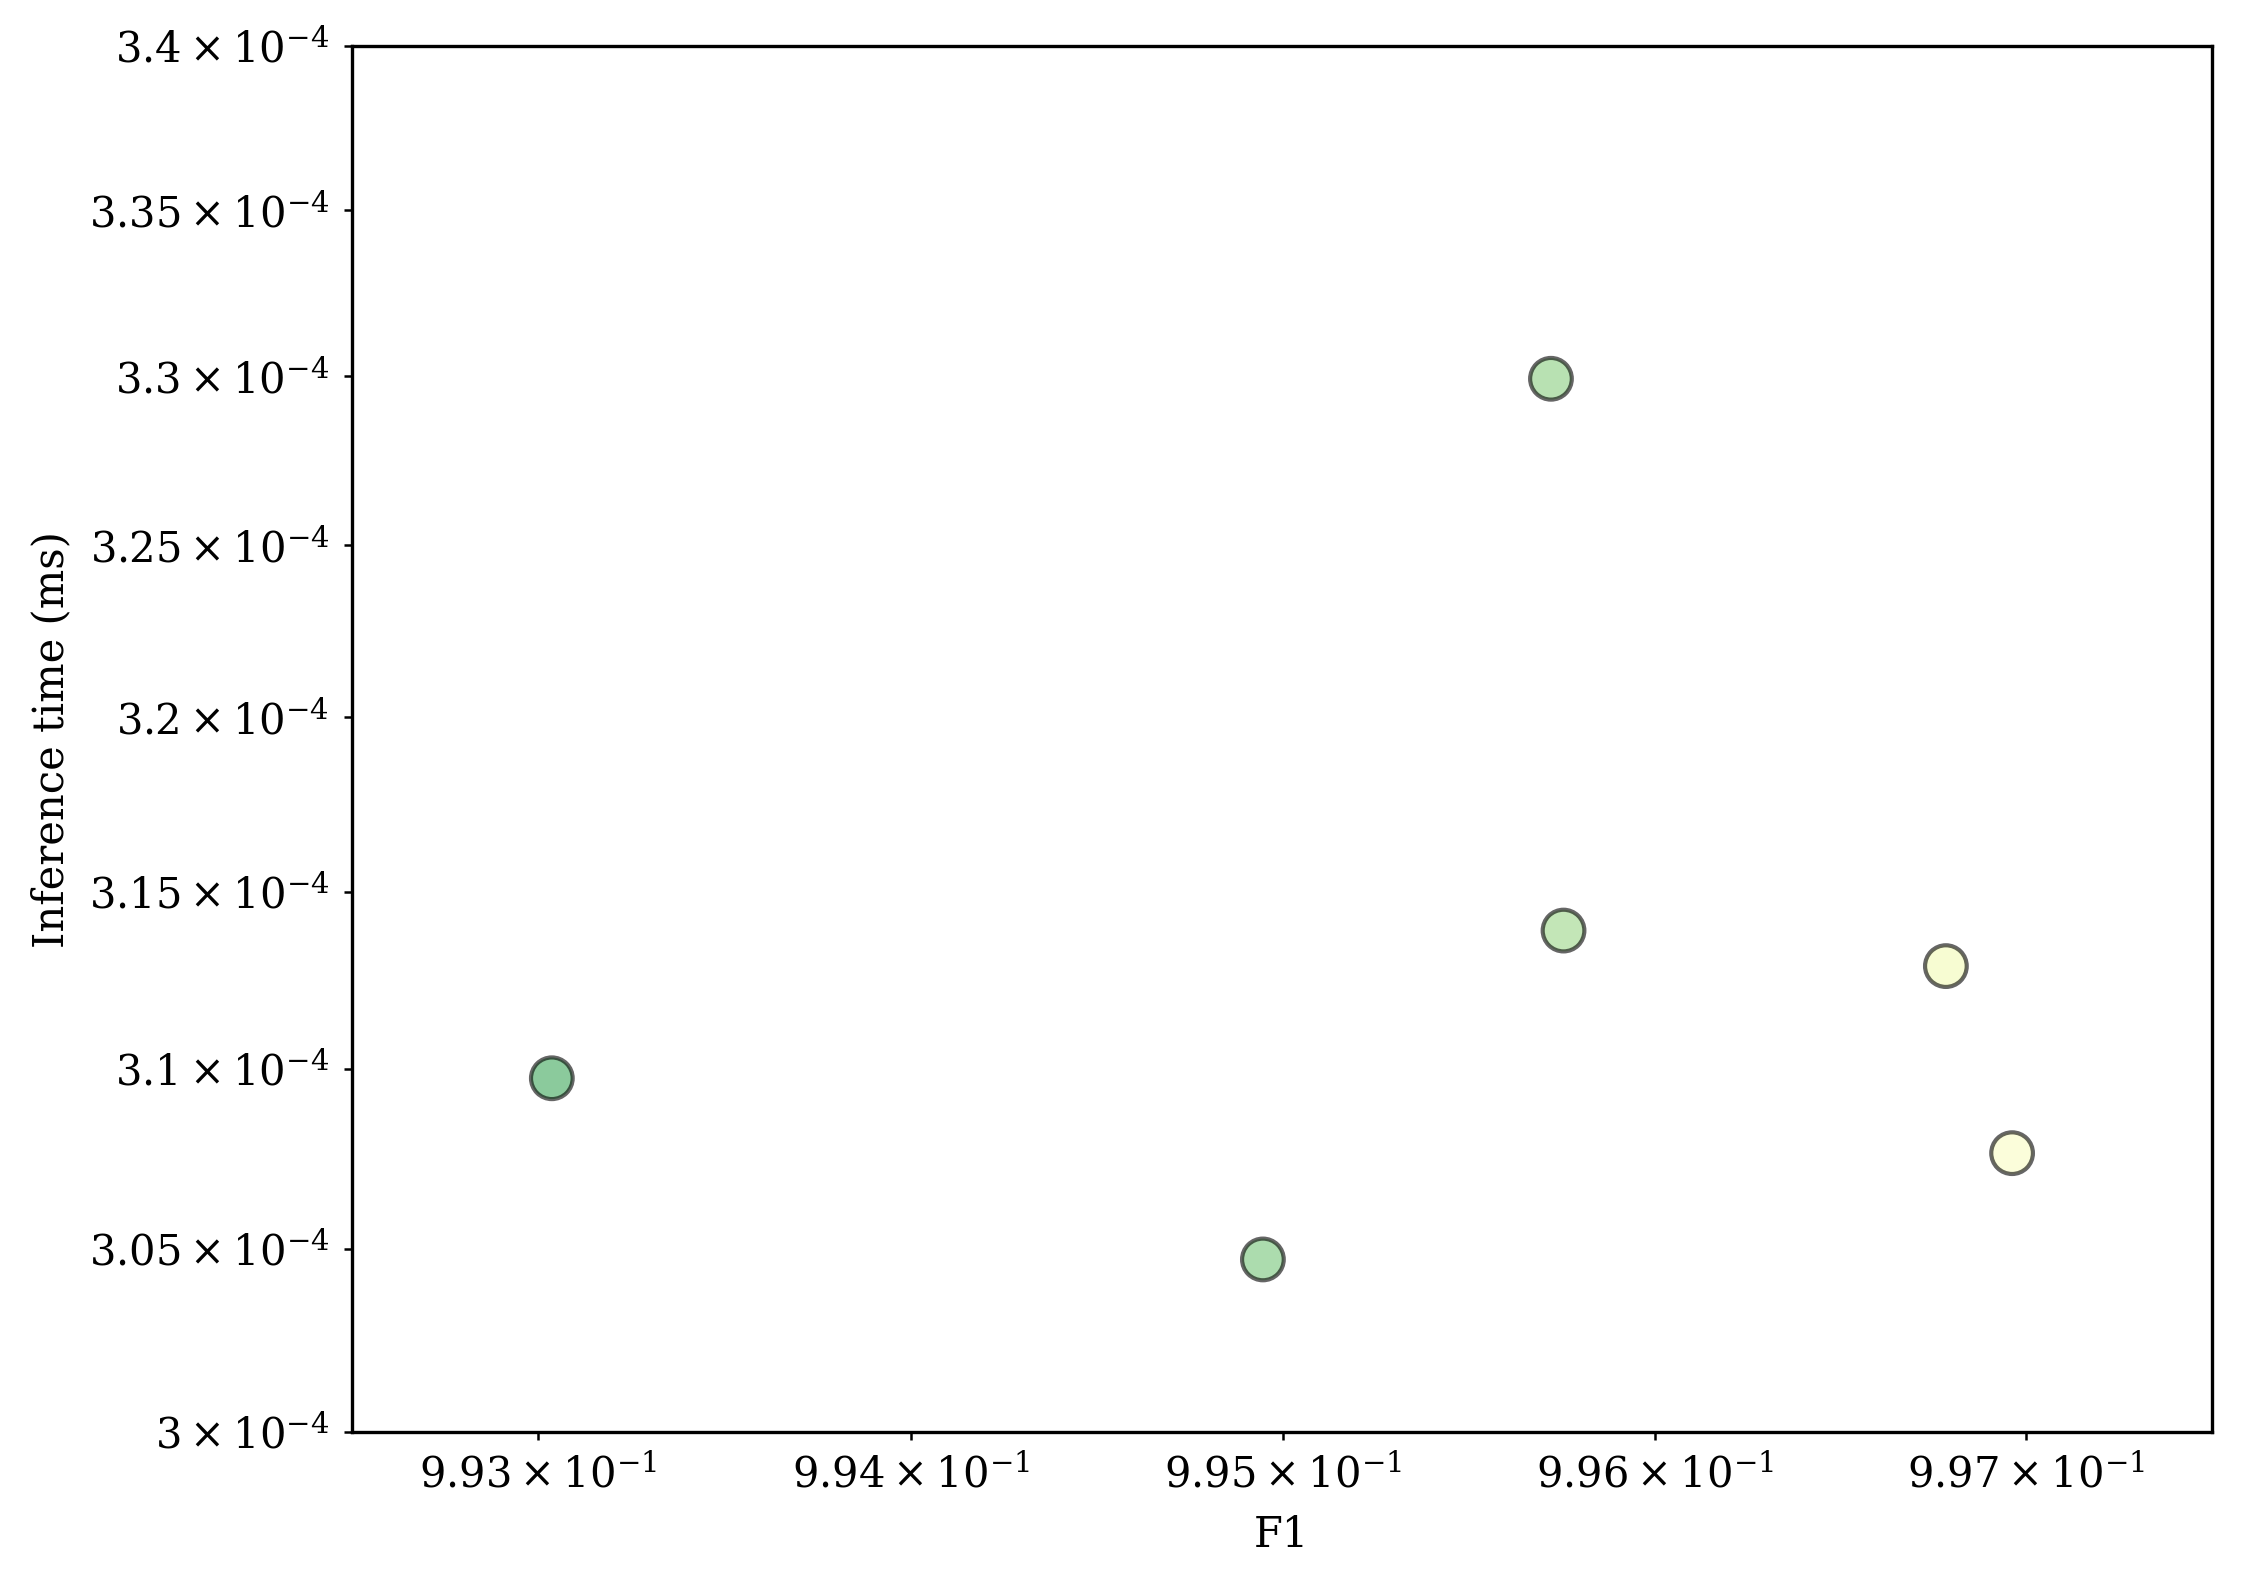

In [42]:
#Scatter plot speed vs F1
from sklearn import preprocessing
from matplotlib.ticker import FuncFormatter
current_figure_name = 'speed_vs_f1_scatter_wo_label.png'

#df_small = df.sort_values(['category','f1'],ascending=[True, False])
df_small = df.sort_values('f1_score',ascending=False)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(1.0000 - df_small['pred_time'].to_numpy().reshape(-1, 1))
df_small['inference scaled'] = x_scaled
f1 = df_small['f1_score']
t_pred = df_small['pred_time']

#colors = df_small.loc[:,'color'].values
#colors = [list(colors[i][0]) for i in range(len(colors))]

colors = df_small.loc[:, 'color'].values.tolist()
colors = [list(color) if isinstance(color, np.ndarray) else [color] for color in colors]


df_small = rename_table_labels(df_small)

# legend
#color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml']
#                         .head(1)['color'].values[0], dtype=np.float32)

#legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')

# Figure
#fig, ax = plt.subplots(figsize=(7, 4))

#plt.xticks(rotation=45, ha='right')
fig, ax  = plt.subplots( figsize=(8, 6))
#my_plot_bar(df_small,ax,'FE_100')
ax.scatter(f1, t_pred, s=100, alpha=0.6, edgecolor='black', linewidth=1, color=colors)
#ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
#ax.set_xticks(ax.get_xticks())
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
#labels = ax.get_xticklabels()
#print(labels)

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


#ax.set(ylim=(0.0002133462738189675, 0.015607442342392))
ax.set(xlim=(0.9925, 0.9975))
ax.set(ylim=(0.0003, 0.00034))
ax.set_ylabel('Inference time (ms)')
ax.set_yscale('log')
ax.set_xlabel('F1')
ax.set_xscale('log')




#fig.tight_layout()
if SAVE_OUTPUTS:
  ax.get_figure().savefig(figure_folder / current_figure_name)

#ax.get_figure().savefig(current_figure_name)

